In [ ]:
!pip install pandas_market_calendars
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
!pip install pmdarima
!pip install statsmodels
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 kB 570.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.1/196.1 kB 3.2 MB/s eta 0:00:00
E: Package 'libfluidsynth1' has no installation candidate
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 4.7 MB/s eta 0:00:00


In [ ]:
!pip install ucimlrepo  # instalamos el paquete específico llamado ucimlrepo para acceder al dataset elegido

## **PUNTO 1:**

*Buscar 3 (tres) series de tiempo y exponer la problemática de interés analítico (es importante detallar cuáles fueron los motivos de elección y situar al lector en el contexto adecuado).*



In [ ]:
#función diseñada para facilitar la descarga de datasets de la colección UCI Machine Learning Repository

from ucimlrepo import fetch_ucirepo
import pandas as pd

#Traigo el  dataset
air_quality = fetch_ucirepo(id=360)

#data (as pandas dataframes)
X = air_quality.data.features
y = air_quality.data.targets

# variable information
print(air_quality.variables)

             name     role         type demographic  \
0            Date  Feature         Date        None   
1            Time  Feature  Categorical        None   
2          CO(GT)  Feature      Integer        None   
3     PT08.S1(CO)  Feature  Categorical        None   
4        NMHC(GT)  Feature      Integer        None   
5        C6H6(GT)  Feature   Continuous        None   
6   PT08.S2(NMHC)  Feature  Categorical        None   
7         NOx(GT)  Feature      Integer        None   
8    PT08.S3(NOx)  Feature  Categorical        None   
9         NO2(GT)  Feature      Integer        None   
10   PT08.S4(NO2)  Feature  Categorical        None   
11    PT08.S5(O3)  Feature  Categorical        None   
12              T  Feature   Continuous        None   
13             RH  Feature   Continuous        None   
14             AH  Feature   Continuous        None   

                                          description       units  \
0                                                N

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_market_calendars as mcal
import warnings
warnings.filterwarnings('ignore')

Generamos la base con la variables con las que vamos a trabajar: Date, Time, C6H6(GT), T, RH

In [ ]:
# Crear el DataFrame con todas las características
df_total= air_quality.data.features

#Seleccionar las columnas específicas con las que vamos a trabajar
df = df_total[['Date', 'Time', 'C6H6(GT)', 'T', 'RH']]

# Mostrar el DataFrame resultante
print(df.head())

        Date      Time  C6H6(GT)     T    RH
0  3/10/2004  18:00:00      11.9  13.6  48.9
1  3/10/2004  19:00:00       9.4  13.3  47.7
2  3/10/2004  20:00:00       9.0  11.9  54.0
3  3/10/2004  21:00:00       9.2  11.0  60.0
4  3/10/2004  22:00:00       6.5  11.2  59.6


In [ ]:
# Cambiar el nombre de la variable C6H6(GT)
df.rename(columns={'C6H6(GT)': 'C6H6'}, inplace=True)

Convertimos la columna Date y Time en indice

In [ ]:
# Crear columna Datetime combinada
df['Datetime'] = df['Date'] + ' ' + df['Time']

# Intentar convertir a datetime y capturar el error
# En lugar de poner format='%d/%m/%Y %H:%M:%S' pusimos dayfirst=False para que infiera automaticamente el formato
try:
    df['Datetime'] = pd.to_datetime(df['Datetime'], dayfirst=False)
except ValueError as e:
    print(f"Error al convertir fechas: {e}")

# Mostrars las filas que no se convirtieron correctamente
print(df[pd.to_datetime(df['Datetime'], errors='coerce').isnull()])

# Mostrar las filas que no se convirtieron correctamente para asegurarnos que se convirtió buen
invalid_dates = df[pd.to_datetime(df['Datetime'], errors='coerce').isnull()]
print("Filas con fechas no válidas:")
print(invalid_dates)

Empty DataFrame
Columns: [Date, Time, C6H6, T, RH, Datetime]
Index: []
Filas con fechas no válidas:
Empty DataFrame
Columns: [Date, Time, C6H6, T, RH, Datetime]
Index: []


In [ ]:
# Establecer la columna datetime como índice
df.set_index('Datetime', inplace=True)

In [ ]:
# Eliminación de las columnas Date y Time
df.drop(['Date', 'Time'], axis=1, inplace=True)

In [ ]:
# Verificación numero de filas de la serie
num_filas = len(df)
print(num_filas)

9357


In [ ]:
# Visualización df
print(df.head())


                     C6H6     T    RH
Datetime                             
2004-03-10 18:00:00  11.9  13.6  48.9
2004-03-10 19:00:00   9.4  13.3  47.7
2004-03-10 20:00:00   9.0  11.9  54.0
2004-03-10 21:00:00   9.2  11.0  60.0
2004-03-10 22:00:00   6.5  11.2  59.6


## **PUNTO 2:**

*Graficar las series originales. Analizar si es necesario diferenciarlas para convertirlas en estacionarias. Exponer los conceptos relacionados con la estacionariedad de la serie.*

In [ ]:
# Graficamos las series temporales
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


Variable C6H6


In [ ]:
# Graficar de la serie temporal de C6H6
plt.figure(figsize=(30, 5))
plt.plot(df.index, df['C6H6'], linestyle='-')
plt.title('Serie Temporal de C6H6')
plt.xlabel('Dia y Hora')
plt.ylabel('C6H6')
plt.grid(True)
plt.show()

Notamos que hay valores que están imputados con -200 en las 3 variables analizadas. Al tratarse de un valor no lógico para las variables en cuestión, decidimos tratar estos valores como NA. Reemplazamos los valores -200 con el método "forward fill" (relleno hacia adelante) es una técnica de imputación de valores nulos en la que cada valor nulo se reemplaza con el último valor válido anterior. Este método se suele usar en series temporales porque se espera que los valores sigan siendo válidos hasta que se observe un nuevo valor.

In [ ]:
# Variable C6H6
# Reemplazar los valores -200 en la columna T con NaN
df['C6H6'] = df['C6H6'].replace(-200, pd.NA)

# Aplicar forward fill para reemplazar los valores NaN
df['C6H6'].fillna(method='ffill', inplace=True)

Una vez que se modificaron los valores -200, se vuelve a graficar las series temporales.

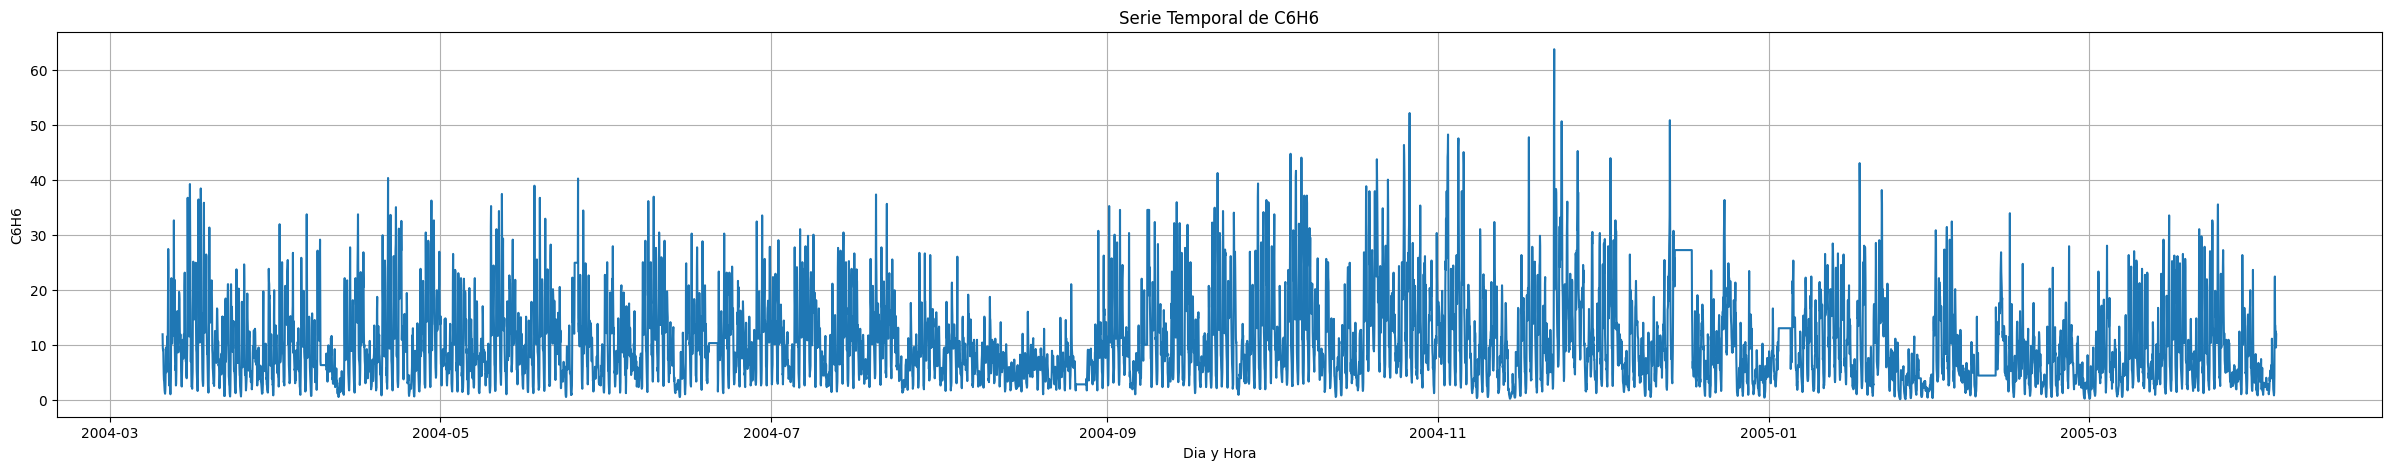

In [ ]:
# Graficar la serie temporal de C6H6(GT)
plt.figure(figsize=(30, 5))
plt.plot(df.index, df['C6H6'], linestyle='-')
plt.title('Serie Temporal de C6H6')
plt.xlabel('Dia y Hora')
plt.ylabel('C6H6')
plt.grid(True)
plt.show()

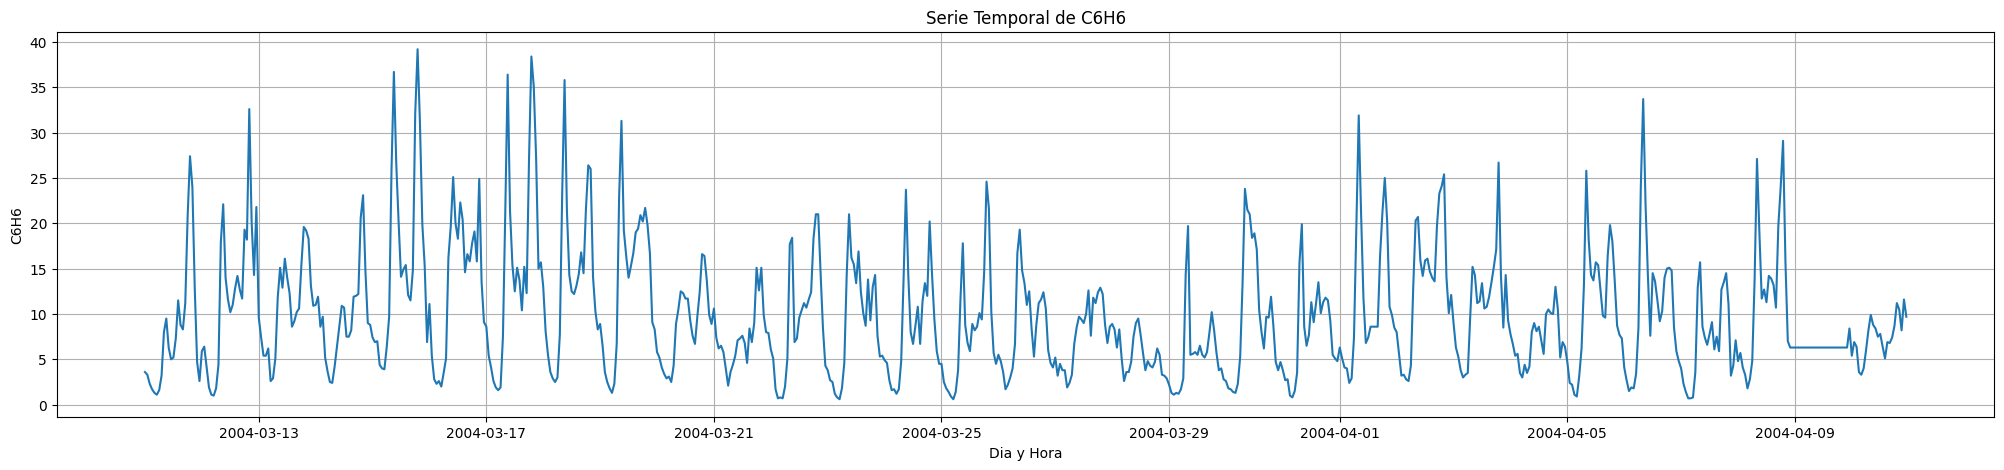

In [ ]:
# Filtrar la serie una semana para ver con claridad la estacionalidad que tiene y la graficamos
start_datetime = '2004-03-11 00:00:00'
end_datetime = '2004-04-10 23:00:00'
df_filtrado = df.loc[start_datetime:end_datetime]

plt.figure(figsize=(25, 5))
plt.plot(df_filtrado.index, df_filtrado['C6H6'], linestyle='-')
plt.title('Serie Temporal de C6H6')
plt.xlabel('Dia y Hora')
plt.ylabel('C6H6')
plt.grid(True)
plt.show()

**Descomposición de las Series C6H6**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

La descomposición puede hacerse de dos maneras: aditiva o multiplicativa. Por el tipo de gráfica que tiene la serie C6H6 optamos por la aditiva.
Consideramos un período de 24 horas.

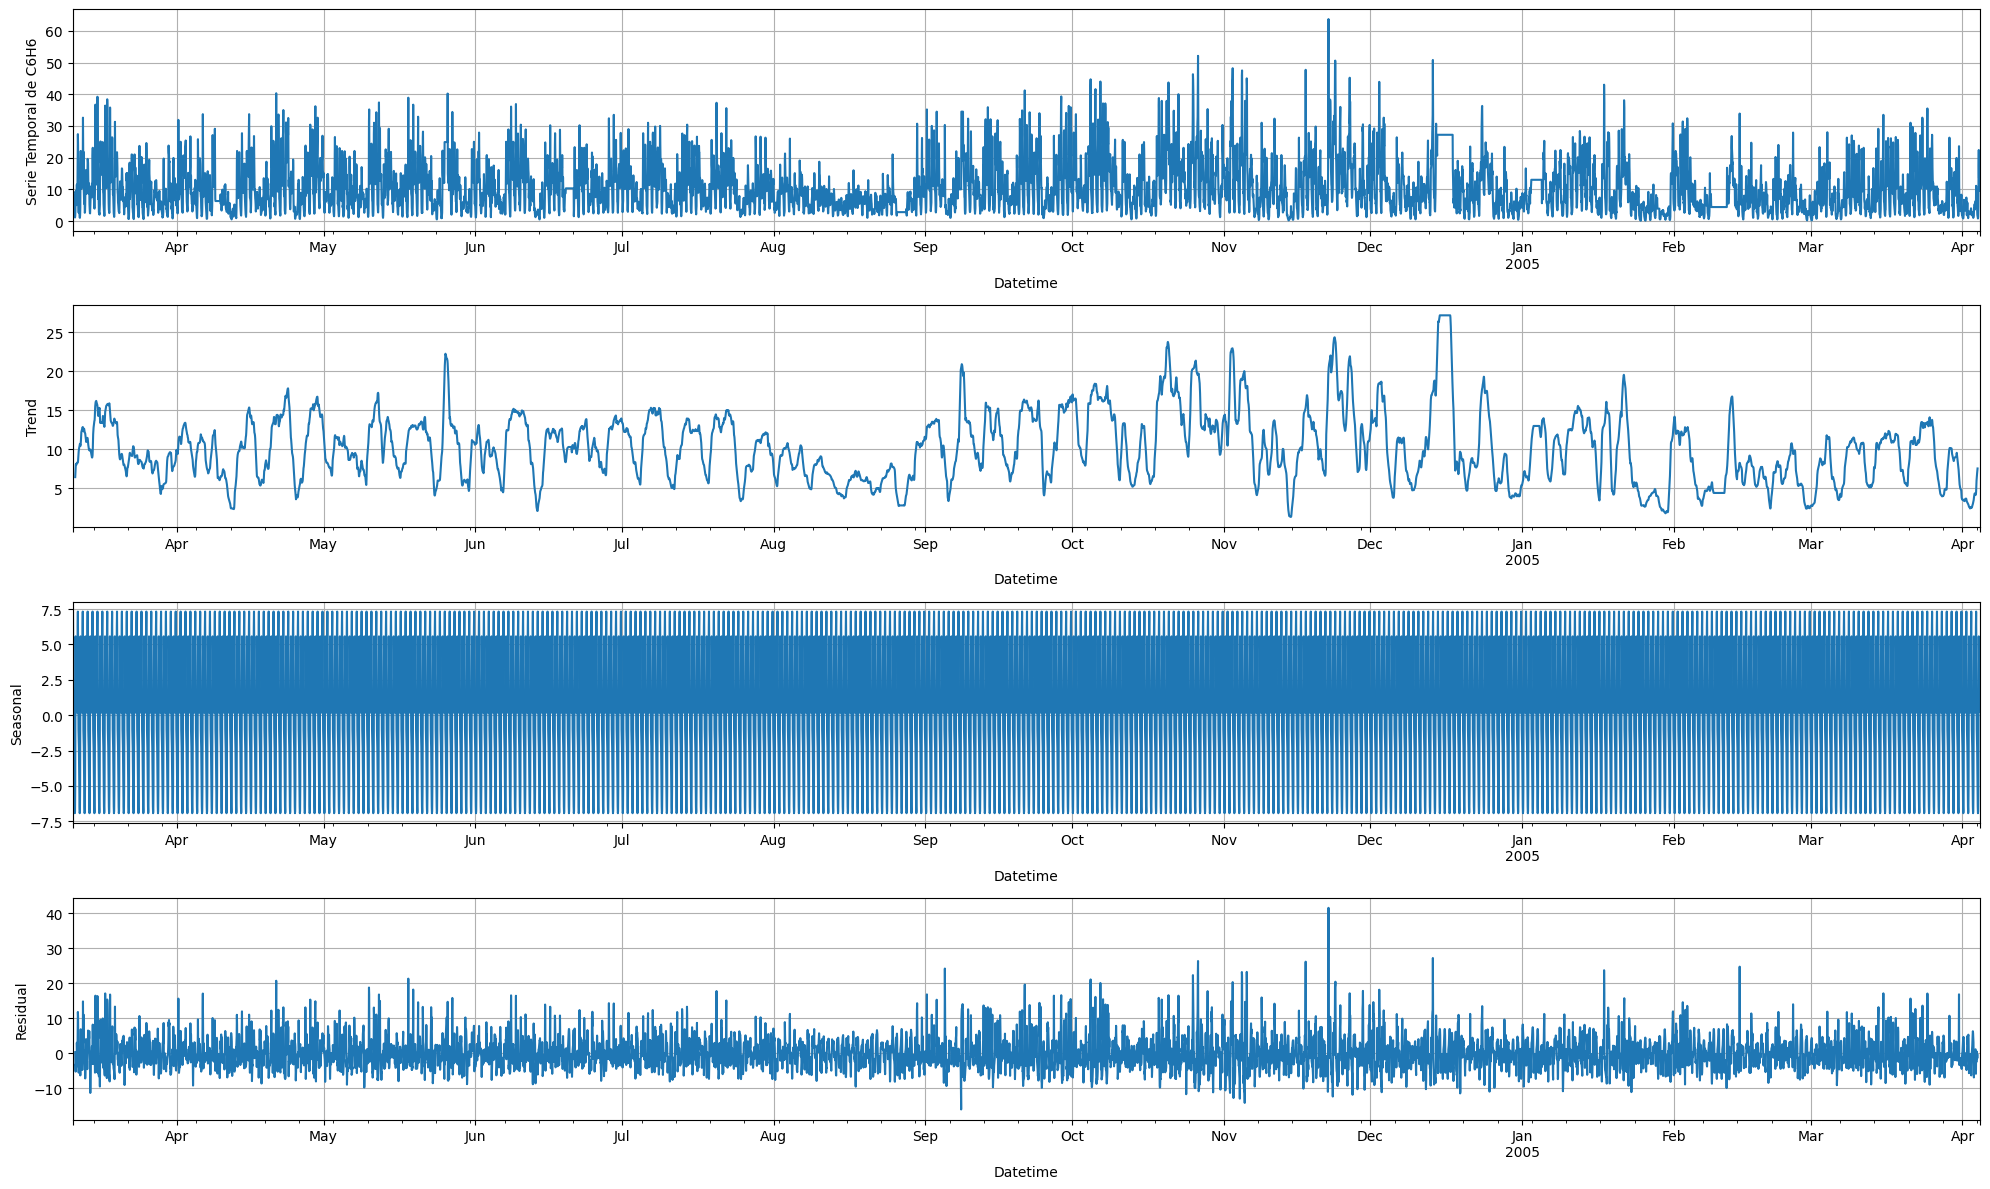

In [ ]:
# Realizar la descomposición estacional aditiva
result_C6H6 = seasonal_decompose(df['C6H6'], model='additive', period=24)

# Configurar el tamaño de la figura
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 12))

# Ploteo de los resultados de la descomposición
plt.subplot(411) #espacio entre los gráficos
result_C6H6.observed.plot(ax=ax1, legend=False)
ax1.set_ylabel('Serie Temporal de C6H6')
ax1.grid(True)

plt.subplot(412)
result_C6H6.trend.plot(ax=ax2, legend=False)
ax2.set_ylabel('Trend')
ax2.grid(True)

plt.subplot(413)
result_C6H6.seasonal.plot(ax=ax3, legend=False)
ax3.set_ylabel('Seasonal')
ax3.grid(True)

plt.subplot(414)
result_C6H6.resid.plot(ax=ax4, legend=False)
ax4.set_ylabel('Residual')
ax4.grid(True)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()


Realizamos la descomposición de los datos de la serie de la primer semana para poder ver mejor los gráficos.

In [ ]:
# Filtrar la primer semana para ver mejor
start_datetime = '2004-03-11 00:00:00'
end_datetime = '2004-04-10 23:00:00'
df_filtrado = df.loc[start_datetime:end_datetime]
print(df_filtrado.head())

                     C6H6     T    RH
Datetime                             
2004-03-11 00:00:00   3.6  11.3  56.8
2004-03-11 01:00:00   3.3  10.7  60.0
2004-03-11 02:00:00   2.3  10.7  59.7
2004-03-11 03:00:00   1.7  10.3  60.2
2004-03-11 04:00:00   1.3  10.1  60.5


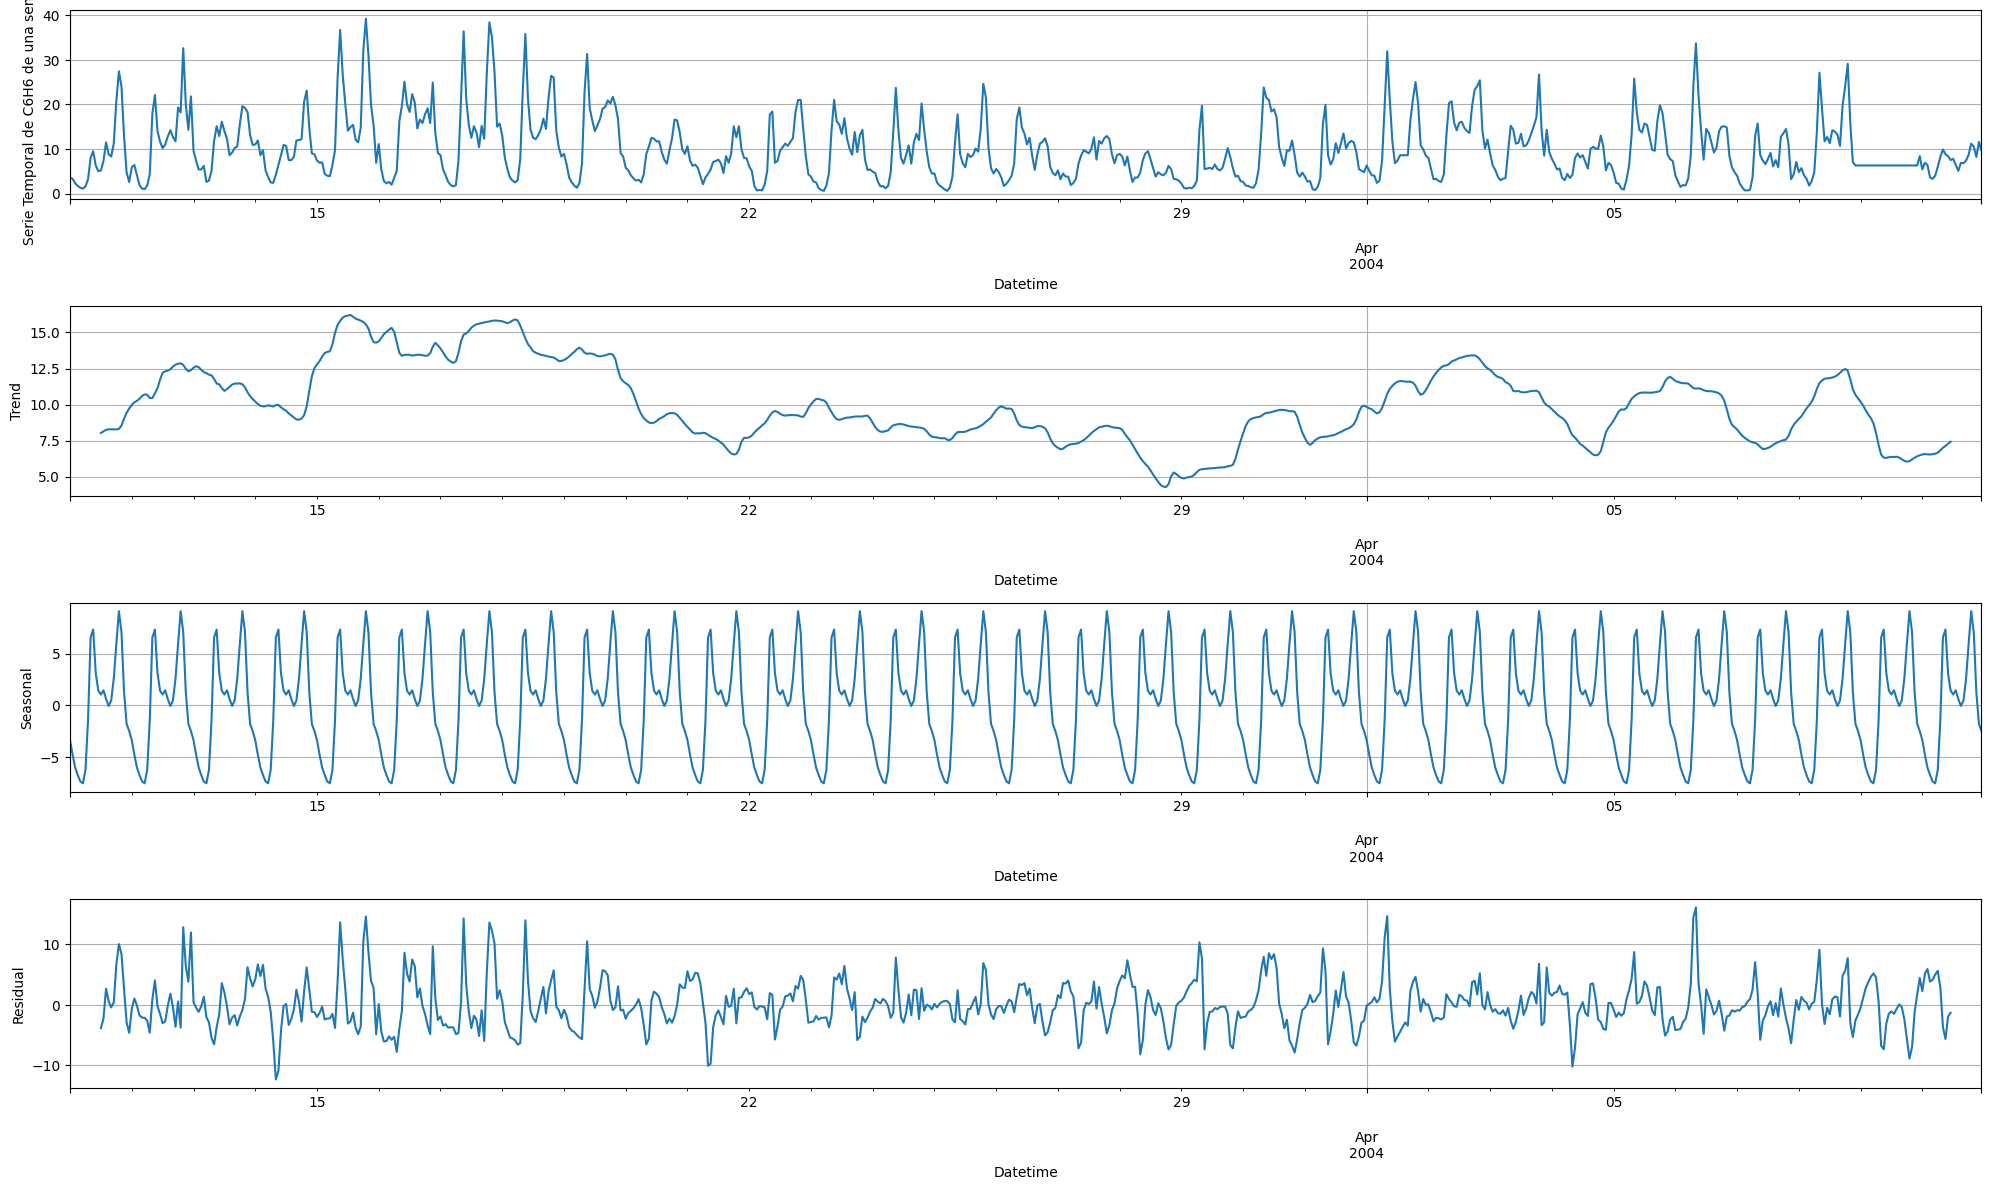

In [ ]:
# Realizar la descomposición estacional aditiva
result_C6H6_filtrado = seasonal_decompose(df_filtrado['C6H6'], model='additive', period=24)

# Configurar el tamaño de la figura
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 12))

# Ploteo de los resultados de la descomposición
plt.subplot(411) #espacio entre los gráficos
result_C6H6_filtrado.observed.plot(ax=ax1, legend=False)
ax1.set_ylabel('Serie Temporal de C6H6 de una semana')
ax1.grid(True)

plt.subplot(412)
result_C6H6_filtrado.trend.plot(ax=ax2, legend=False)
ax2.set_ylabel('Trend')
ax2.grid(True)

plt.subplot(413)
result_C6H6_filtrado.seasonal.plot(ax=ax3, legend=False)
ax3.set_ylabel('Seasonal')
ax3.grid(True)

plt.subplot(414)
result_C6H6_filtrado.resid.plot(ax=ax4, legend=False)
ax4.set_ylabel('Residual')
ax4.grid(True)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()


Se observa:

*   una tendendcia constante, alrededor del valor 10
*   una estacionalidad diaria, cada 24 horas
*   no se ve ningún patron en los residuos


### **PUNTO 3:**
*Graficar la FAS, FAC y FACP de las mismas en un solo gráfico y analizarlas. ¿Qué puede inferir de los gráficos?*

Variable C6H6

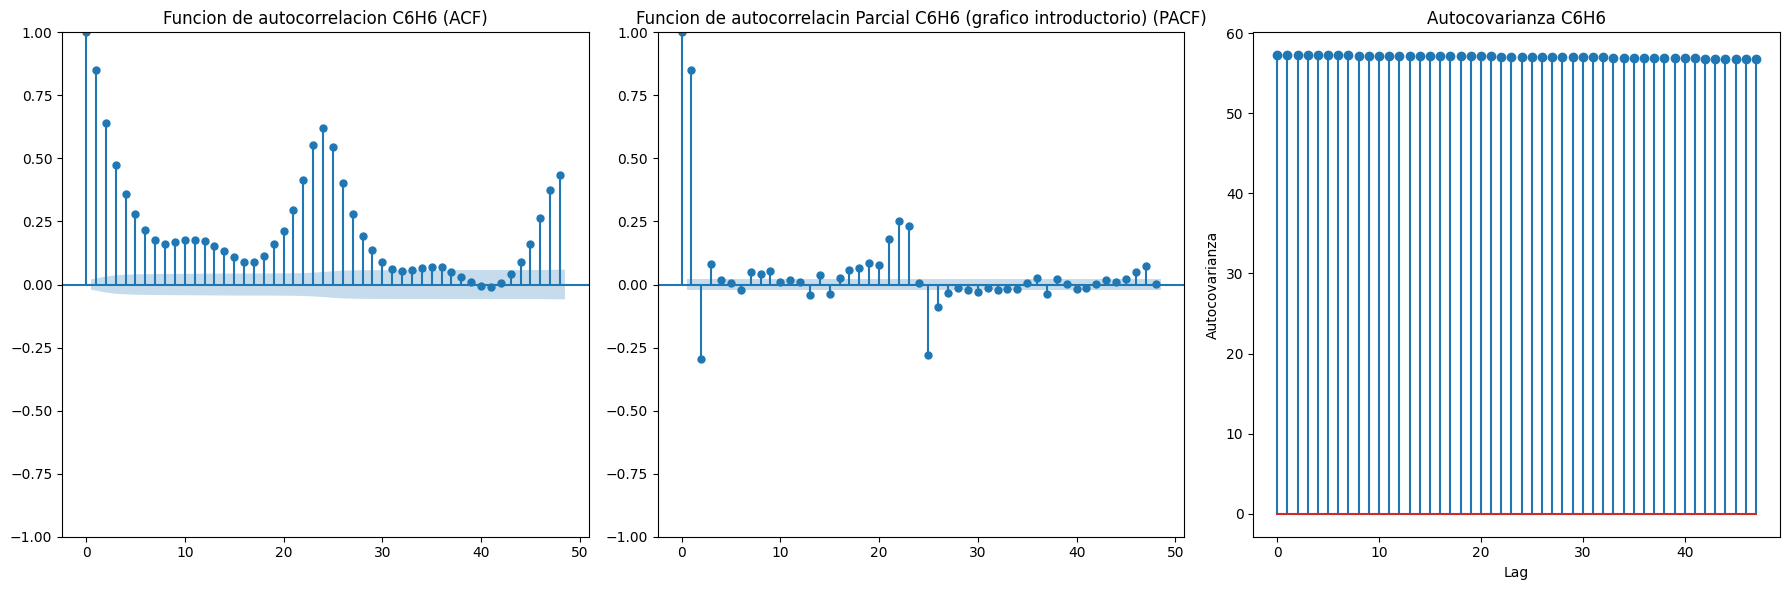

In [ ]:

# Grafica de ACF, PACF y autocovarianza para C6H6
import statsmodels.api as sm
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
Y=df['C6H6']
sm.graphics.tsa.plot_acf(Y, lags=48, ax=ax[0])
ax[0].set_title('Funcion de autocorrelacion C6H6 (ACF)')

sm.graphics.tsa.plot_pacf(Y, lags=48, ax=ax[1])
ax[1].set_title('Funcion de autocorrelacin Parcial C6H6 (grafico introductorio) (PACF)')

def autocovariance(series, lag):
    series_mean = np.mean(series)
    n = len(series)
    return np.sum((series[:n-lag] - series_mean) * (series[lag:] - series_mean)) / n

lags = np.arange(48)
autocov = [autocovariance(Y, lag) for lag in lags]

ax[2].stem(lags, autocov, use_line_collection=True)
ax[2].set_title('Autocovarianza C6H6')
ax[2].set_xlabel('Lag')
ax[2].set_ylabel('Autocovarianza')

plt.tight_layout()
plt.show()

**Analisis de los gráficos**

**Gráfico FAC:** mide la correlación entre la serie temporal y sus rezagos. El modo de caida exponencial (curva) que se repite cada 24 hs se puede interpretar como un patron fuerte de estacionalidad que se repite cada día. Al estar todos los valores fuera de la banda de confianza significa que las correlaciones son significativas, o sea no al azar.

**Gráfico PFAC:** mide la correlación entre la serie temporal y sus rezagos, eliminando la influencia de los rezagos intermedios. Los cortes abruptos indican estacionalidad.

**Gráficos Autocovarianzas:** indica la variabilidad entre diferentes puntos de tiempo en una serie temporal.Al ser valores muy similares se puede interpretar como una serie de memoria larga.



In [ ]:
import pmdarima as pm

**a) Diferenciacion de la parte no estacional**

Por el gráfico no parecería tener tendencia. Para constatalo determino el numero de diferenicaciones

In [ ]:
# Determinar  el número óptimo de diferenciaciones no estacionales
n_diffs = pm.arima.ndiffs(df['C6H6'], test='adf')
print("Número óptimo de diferenciaciones no estacionales:", n_diffs)

Número óptimo de diferenciaciones no estacionales: 0


No requiere diferenciaciones para la parte no estacional.

**b) Diferenciación 24 hs de la parte estacionaria**

In [ ]:
# Diferenciación regular d=24 hora de C6H6
df_C6H6_24 = df['C6H6'].diff(24).dropna()
print(len(df_C6H6_24))

9333


**c) Transformación de box cox para estabilizar la varianza**

Los datos tienen mucha varianza, la transformación de box cox ayudan a estabiliza y en consecuencia mejoran la normalidad. Llegado el momento analizaremos si utilizamos la serie con los datos transformados nos sirve. Hay que tener en cuenta que, si se usan los datos transformados, en el cálculo de la predicción hay que destransformarlos para conocer su verdadero valor.

In [ ]:
from scipy.stats import jarque_bera, shapiro, boxcox, probplot


In [ ]:
# realizamos la transformación de Box-Cox en datos originales
df['C6H6_boxcox'], lam = boxcox(df['C6H6'])
print("Lambda:", lam)


Lambda: 0.2600070028481567


In [ ]:
# graficamos la serie con los datos transformados por Box-Cox
plt.figure(figsize=(30, 5))
plt.plot(df.index, df['C6H6_boxcox'], linestyle='-')
plt.title('Serie Temporal de C6H6 transformada')
plt.xlabel('Dia y Hora')
plt.ylabel('C6H6')
plt.grid(True)
plt.show()


Se puede observar en el gráfico como disminuyo la variabilidad (rango de valores)



In [ ]:
#Renombrar para unificar nombres
df_C6H6 = df['C6H6']  #serie original
df_C6H6_24 = df_C6H6_24 #serie diferenciada 24 hs
df_C6H6_boxcox = df['C6H6_boxcox'] #serie con datos transformados


## **PUNTO 4:**
*Realizar distintas pruebas de raices unitarias para determinar si las series son o no estacionarias*

Una raíz unitaria indica que la serie tiene una tendencia estocastica o deterministica que implica que las propiedades estadísticas de la serie, como la media y la varianza, no son constantes a lo largo del tiempo.

Se aplica el test a los datos y diferenciados 24 hs

**a) Test ADF (Dickey-Fuller Aumentado)**

El Test ADF evalúa la hipótesis nula de que una serie temporal tiene una raíz unitaria (es no estacionaria).

Hipótesis nula (H0): La serie tiene una raíz unitaria (la serie no es estacionaria).

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss
from numpy import log

In [ ]:
# Realizar el test de Dickey-Fuller sobre la serie diferenciada 24 hs

ADF_C6H6 = adfuller(df_C6H6_24)
print('ADF Statistic: %f' % ADF_C6H6[0])#imprime sólo el estadístico
print('p-value: %f' % ADF_C6H6[1]) #imprime sólo el p-valor

ADF Statistic: -15.665564
p-value: 0.000000


El p-valor es 0 < 0,05  por lo tanto se rechaza la H0. Se asume la H1: la serie es estacionaria.
Esto implica que la media y la varianza constantes.
Se puede aplicar el modelo ARIMA


**b) Test KPSS (Kwiatkowski-Phillips-Schmidt-Shin)**

El Test KPSS se utiliza una hipótesis nula contraria al test anterior.

Hipótesis nula (H0): La serie es estacionaria, no presenta raiz unitaria.

In [ ]:
# Realizamos el Test KPSS

kpss_C6H6 = kpss(df_C6H6_24)
print('Kpss Statistic: %f' % kpss_C6H6[0])  # imprime sólo el estadístico
print('p-value: %f' % kpss_C6H6[1])  # imprime sólo el p-valor



Kpss Statistic: 0.005668
p-value: 0.100000


<ipython-input-31-311bbe2279b8>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_C6H6 = kpss(df_C6H6_24)


El p-valor es 0.1 > 0.05 no se rechaza la H0. Se asume que la serie es estacionaria.




**c) Test PP (Phillips-Perron)**

Se utiliza para detectar la presencia de raíces unitarias en una serie temporal.

Hipótesis nula (H0): La serie tiene una raíz unitaria (la serie es no estacionaria).

In [ ]:
from arch.unitroot import PhillipsPerron

# Realizamos el test de Phillips-Perron
pp_result = PhillipsPerron(df_C6H6_24)

# Mostramos los resultados
print('Estadístico PP:', pp_result.stat)
print('Valor p:', pp_result.pvalue)


Estadístico PP: -33.02429767206648
Valor p: 0.0


P-valor es 0 < 0.05 por lo que se rechazo la H0. Se asume que la serie es estacionaria.

## **PUNTO 5:**
*Efectuar una estimación de la serie temporal con distintos órdenes de parámetros de modelos SARIMA y encontrar aquel que se ajuste mejor a los datos (pueden emplear Criterios de Información/Selección y analizar significatividad individual y global de los parámetros del modelo).*

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
# Ya tenemos el ACF y PACF de la serie original, ahora lo graficamos para la serie con una diferenciación de 24
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
Y=df_C6H6_24
sm.graphics.tsa.plot_acf(Y, lags=48, ax=ax[0])
ax[0].set_title('ACF DE C6H6 diferenicacion 24')

sm.graphics.tsa.plot_pacf(Y, lags=48, ax=ax[1])
ax[1].set_title('PACF DE C6H6 diferenicacion 24')

Text(0.5, 1.0, 'PACF DE C6H6 diferenicacion 24')

MODELO ARIMA (p,d,q)

Término p: Se determina observando la FACP. Identifica el primer lag donde la correlación es significativa y luego decrece a un nivel insignificante (por debajo de la banda azul en el gráfico).

Término d: Es el número de veces que se diferencia la serie para hacerla estacionaria. Puedes determinarlo observando la serie original y contando cuántas veces debes diferenciarla hasta que se vuelva estacionaria (media y varianza constantes).

Término q: Se determina observando la ACF. Identifica el primer lag donde la correlación es significativa y luego decrece a un nivel insignificante (por debajo de la banda azul en el gráfico).

En este caso aunque hemos diferenciado la serie para quitar la estacionalidad y ver la posibildiad de detectar los p y q de un ARIMA, vemos que los lags tienden a infinito, conviene probar con diferentec combinaciones de p, q, P y Q

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

**MODELOS SARIMA**

Fijamos los valores de d=0 y D=1 y probamos con valores de p, q, P y Q entre 0 y 2. Ajustariamos también estos lags si vemos que algun coeficiente no es significativo y lo podes disminuir.

Descartamos grid search porque tarda mucho y no da la RAM disponible


In [ ]:
#modelo1 (2,0,2)(2,1,2,24)
modelo1 = SARIMAX(df_C6H6, order=(2,0,2), seasonal_order=(2,1,2,24))
modelo1_fit = modelo1.fit()
print(modelo1_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               C6H6   No. Observations:                 9357
Model:             SARIMAX(2, 0, 2)x(2, 1, 2, 24)   Log Likelihood              -23864.829
Date:                            Sat, 06 Jul 2024   AIC                          47747.657
Time:                                    19:46:36   BIC                          47811.929
Sample:                                03-10-2004   HQIC                         47769.488
                                     - 04-04-2005                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5693      0.023     68.189      0.000       1.524       1.614
ar.L2         -0.5847      0.020   

In [ ]:
#modelo2 (2,0,2)(1,1,1,24)
modelo2 = SARIMAX(df_C6H6, order=(2,0,2), seasonal_order=(1,1,1,24))
modelo2_fit = modelo2.fit()
print(modelo2_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                 C6H6   No. Observations:                 9357
Model:             SARIMAX(2, 0, 2)x(1, 1, [1], 24)   Log Likelihood              -23864.895
Date:                              Sat, 06 Jul 2024   AIC                          47743.790
Time:                                      20:03:49   BIC                          47793.779
Sample:                                  03-10-2004   HQIC                         47760.769
                                       - 04-04-2005                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5693      0.023     68.350      0.000       1.524       1.614
ar.L2         -0.58

In [ ]:
#modelo3 (2,0,2)(1,1,0,24)
modelo3 = SARIMAX(df_C6H6, order=(2,0,2), seasonal_order=(1,1,0,24))
modelo3_fit = modelo3.fit()
print(modelo3_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                C6H6   No. Observations:                 9357
Model:             SARIMAX(2, 0, 2)x(1, 1, [], 24)   Log Likelihood              -25276.066
Date:                             Sat, 06 Jul 2024   AIC                          50564.133
Time:                                     20:07:36   BIC                          50606.981
Sample:                                 03-10-2004   HQIC                         50578.687
                                      - 04-04-2005                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4496      0.049     29.544      0.000       1.353       1.546
ar.L2         -0.4887      

In [ ]:
#modelo4 (2,0,1)(1,1,1,24)
modelo4 = SARIMAX(df_C6H6, order=(2,0,1), seasonal_order=(1,1,1,24))
modelo4_fit = modelo4.fit()
print(modelo4_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               C6H6   No. Observations:                 9357
Model:             SARIMAX(2, 0, 1)x(1, 1, 1, 24)   Log Likelihood              -23930.406
Date:                            Sat, 06 Jul 2024   AIC                          47872.812
Time:                                    20:11:21   BIC                          47915.660
Sample:                                03-10-2004   HQIC                         47887.365
                                     - 04-04-2005                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3935      0.060      6.573      0.000       0.276       0.511
ar.L2          0.3370      0.053   

In [ ]:
#modelo5 (2,0,0)(1,1,1,24)
modelo5 = SARIMAX(df_C6H6, order=(2,0,0), seasonal_order=(1,1,1,24))
modelo5_fit = modelo5.fit()
print(modelo5_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                 C6H6   No. Observations:                 9357
Model:             SARIMAX(2, 0, 0)x(1, 1, [1], 24)   Log Likelihood              -23958.635
Date:                              Sat, 06 Jul 2024   AIC                          47927.271
Time:                                      20:23:13   BIC                          47962.978
Sample:                                  03-10-2004   HQIC                         47939.399
                                       - 04-04-2005                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9082      0.006    155.066      0.000       0.897       0.920
ar.L2         -0.08

In [ ]:
#modelo6 (1,0,1)(1,1,0,24)
modelo6 = SARIMAX(df_C6H6, order=(1,0,1), seasonal_order=(1,1,1,24))
modelo6_fit = modelo6.fit()
print(modelo6_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               C6H6   No. Observations:                 9357
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 24)   Log Likelihood              -23948.365
Date:                            Sat, 06 Jul 2024   AIC                          47906.731
Time:                                    20:34:30   BIC                          47942.437
Sample:                                03-10-2004   HQIC                         47918.859
                                     - 04-04-2005                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7931      0.005    149.522      0.000       0.783       0.804
ma.L1          0.1343      0.009   

In [ ]:
#modelo7 (1,0,1)(0,1,0,24)
modelo7 = SARIMAX(df_C6H6, order=(1,0,1), seasonal_order=(0,1,0,24))
modelo7_fit = modelo7.fit()
print(modelo7_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                                C6H6   No. Observations:                 9357
Model:             SARIMAX(1, 0, 1)x(0, 1, [], 24)   Log Likelihood              -26166.121
Date:                             Sun, 07 Jul 2024   AIC                          52338.242
Time:                                     02:18:29   BIC                          52359.666
Sample:                                 03-10-2004   HQIC                         52345.519
                                      - 04-04-2005                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7550      0.006    124.924      0.000       0.743       0.767
ma.L1          0.1039      

In [ ]:
#vamos a porbar el modelos2  con los datos transformados a ver si mejora la heterocedasticidad del modelo
#modelo2 (2,0,2)(1,1,1,24)
modelo2_boxcox = SARIMAX(df_C6H6_boxcox, order=(2,0,2), seasonal_order=(1,1,1,24))
modelo2_boxcox_fit = modelo2_boxcox.fit()
print(modelo2_boxcox_fit.summary())



                                      SARIMAX Results                                       
Dep. Variable:                          C6H6_boxcox   No. Observations:                 9357
Model:             SARIMAX(2, 0, 2)x(1, 1, [1], 24)   Log Likelihood               -6124.820
Date:                              Sat, 06 Jul 2024   AIC                          12263.639
Time:                                      20:44:44   BIC                          12313.628
Sample:                                  03-10-2004   HQIC                         12280.618
                                       - 04-04-2005                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6790      0.024     68.620      0.000       1.631       1.727
ar.L2         -0.68

**Pruebo que valores dar auto arima para la parte no estaciona**

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
#Busqueda de los parametros de la parte no estacional
stepwise_fit = auto_arima(df_C6H6, trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=51486.826, Time=16.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=53202.452, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=52832.018, Time=0.50 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=52691.538, Time=1.67 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=53200.452, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=51530.284, Time=8.87 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=51505.696, Time=7.30 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=51488.686, Time=21.64 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=51488.833, Time=24.30 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=52654.460, Time=3.03 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=51490.574, Time=10.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=51487.554, Time=10.63 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=51488.351, Time=16.78 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=51484.835, Time=4.54 sec
 ARIMA(1,1,2)

In [ ]:
#A los parametros estacionales del modelos modelo2 se agregan los parametros no estacionales del auto arima (2,1,3)(1,1,1,24)
modelo2_aut = SARIMAX(df_C6H6, order=(2,1,3), seasonal_order=(1,1,1,24))
modelo2_aut_fit = modelo2_aut.fit()
print(modelo2_aut_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                 C6H6   No. Observations:                 9357
Model:             SARIMAX(2, 1, 3)x(1, 1, [1], 24)   Log Likelihood              -23915.302
Date:                              Sat, 06 Jul 2024   AIC                          47846.604
Time:                                      21:00:09   BIC                          47903.733
Sample:                                  03-10-2004   HQIC                         47866.008
                                       - 04-04-2005                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4738      0.364      1.302      0.193      -0.239       1.187
ar.L2          0.15

ANALIZANDO LOS VALORES OBTENIDOS, SELECCIONAMOS EL MODELO B [texto del enlace](https://docs.google.com/spreadsheets/d/1EvuHaxhNZTM18ItsS0pYelomecI3wAsA/edit?usp=drive_link&ouid=106776308098076286911&rtpof=true&sd=true)

## **PUNTO 6:**
*Evaluar alguna métrica de performance teniendo en cuenta el entrenamiento del modelo entre Training Set y Testing Set.*

In [ ]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba 80% y 20% de df_C6H6_boxcox

df_C6H6_train = df_C6H6.iloc[:round(len(df_C6H6)*.8)]
df_C6H6_test = df_C6H6.iloc[round(len(df_C6H6)*.8):]

print(df_C6H6_train)
print(df_C6H6_test)


Datetime
2004-03-10 18:00:00    11.9
2004-03-10 19:00:00     9.4
2004-03-10 20:00:00     9.0
2004-03-10 21:00:00     9.2
2004-03-10 22:00:00     6.5
                       ... 
2005-01-16 11:00:00     2.6
2005-01-16 12:00:00     2.2
2005-01-16 13:00:00     3.0
2005-01-16 14:00:00     1.9
2005-01-16 15:00:00     2.0
Name: C6H6, Length: 7486, dtype: float64
Datetime
2005-01-16 16:00:00     2.8
2005-01-16 17:00:00     3.3
2005-01-16 18:00:00     3.4
2005-01-16 19:00:00     7.1
2005-01-16 20:00:00     7.4
                       ... 
2005-04-04 10:00:00    13.5
2005-04-04 11:00:00    11.4
2005-04-04 12:00:00    12.4
2005-04-04 13:00:00     9.5
2005-04-04 14:00:00    11.9
Name: C6H6, Length: 1871, dtype: float64


In [ ]:
#Grafico train y test
plt.figure(figsize=(20, 6))

plt.plot(df_C6H6_train, label='Entrenamiento', color='darkblue', linestyle='-', linewidth=1)
plt.plot(df_C6H6_test, label='Test', color='orange', linestyle='-', linewidth=1)

plt.title(' Datos de Entrenamiento y Test')
plt.xlabel('Datatime')
plt.ylabel('Valores de C6H6')

plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import statsmodels.api as sm

In [ ]:
# Ajustamos el modelo2 SARIMA  con los datos de entrenamiento
modelo2_C6H6_train = sm.tsa.SARIMAX(df_C6H6_train, order=(2, 0, 2), seasonal_order=(1, 1, 1, 24))
resultados_modelo2 = modelo2_C6H6_train.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [ ]:
# Realizar la predicción en el conjunto de prueba usando el comando predic
predicciones_C6H6 = resultados_modelo2.predict(start=df_C6H6_test.index[0], end=df_C6H6_test.index[-1])
print(predicciones_C6H6)

2005-01-16 16:00:00     4.859926
2005-01-16 17:00:00     8.141127
2005-01-16 18:00:00    11.658090
2005-01-16 19:00:00    12.572875
2005-01-16 20:00:00    11.463941
                         ...    
2005-04-04 10:00:00    11.536377
2005-04-04 11:00:00    11.252027
2005-04-04 12:00:00    11.232229
2005-04-04 13:00:00    12.621381
2005-04-04 14:00:00    12.193979
Freq: H, Name: predicted_mean, Length: 1871, dtype: float64


In [ ]:
# Realizar la predicción en el conjunto de prueba usando el comando get_prediction
predicciones_C6H6 = resultados_modelo2.get_prediction(start=df_C6H6_test.index[0], end=df_C6H6_test.index[-1])
predicciones_C6H6_mean = predicciones_C6H6.predicted_mean
print(predicciones_C6H6_mean)

2005-01-16 16:00:00     4.859926
2005-01-16 17:00:00     8.141127
2005-01-16 18:00:00    11.658090
2005-01-16 19:00:00    12.572875
2005-01-16 20:00:00    11.463941
                         ...    
2005-04-04 10:00:00    11.536377
2005-04-04 11:00:00    11.252027
2005-04-04 12:00:00    11.232229
2005-04-04 13:00:00    12.621381
2005-04-04 14:00:00    12.193979
Freq: H, Name: predicted_mean, Length: 1871, dtype: float64


In [ ]:
# Intervalos de confianza
intervalos_confianza = predicciones_C6H6.conf_int()
print(intervalos_confianza)

                     lower C6H6  upper C6H6
2005-01-16 16:00:00   -1.376179   11.096030
2005-01-16 17:00:00   -0.285581   16.567835
2005-01-16 18:00:00    2.303951   21.012230
2005-01-16 19:00:00    2.735432   22.410318
2005-01-16 20:00:00    1.338697   21.589184
...                         ...         ...
2005-04-04 10:00:00   -3.929415   27.002170
2005-04-04 11:00:00   -4.214070   26.718124
2005-04-04 12:00:00   -4.234150   26.698607
2005-04-04 13:00:00   -2.845258   28.088019
2005-04-04 14:00:00   -3.272900   27.660858

[1871 rows x 2 columns]


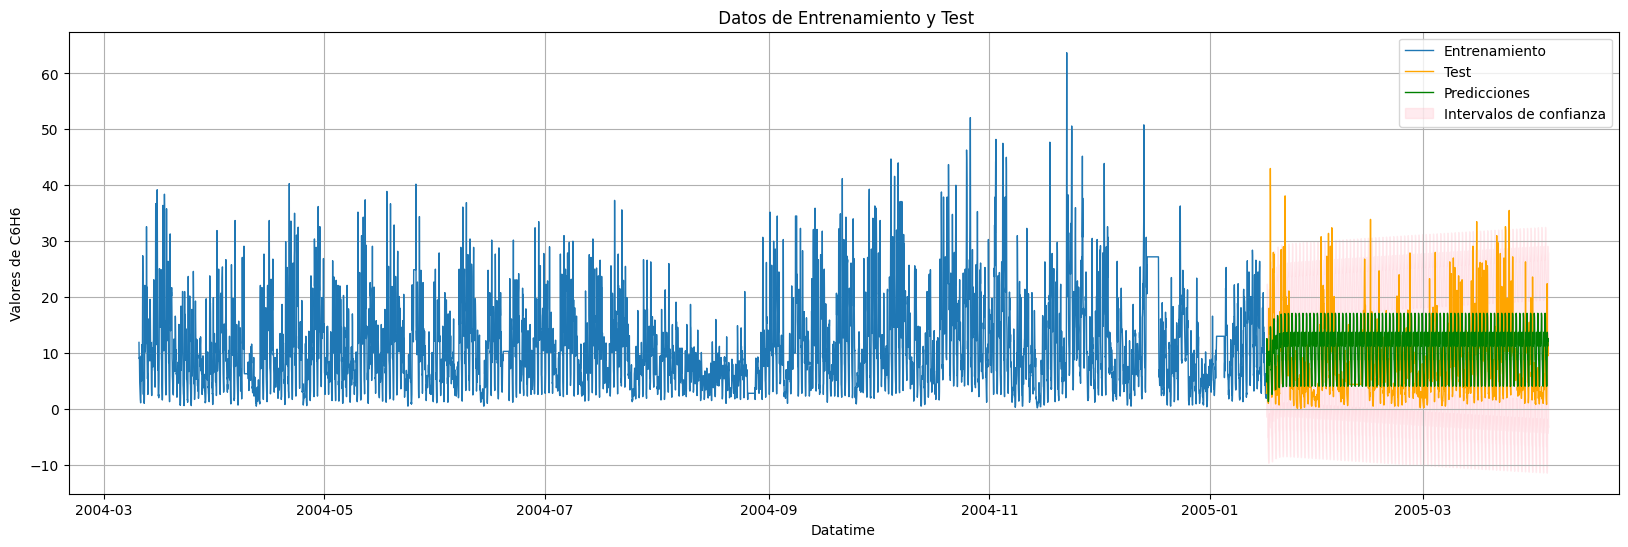

In [ ]:
# Graficamos los resultados
plt.figure(figsize=(20, 6))
plt.plot(df_C6H6_train, label='Entrenamiento', linestyle='-', linewidth=1)
plt.plot(df_C6H6_test, label='Test', color='orange', linestyle='-', linewidth=1)
plt.plot(df_C6H6_test.index, predicciones_C6H6_mean, label='Predicciones', color='green', linestyle='-', linewidth=1 )

# Añadimos los intervalo de confianza a la gráfica
plt.fill_between(df_C6H6_test.index,
                 intervalos_confianza.iloc[:, 0],
                 intervalos_confianza.iloc[:, 1],
                 color='pink', alpha=0.3, label='Intervalos de confianza')


plt.title(' Datos de Entrenamiento y Test')
plt.xlabel('Datatime')
plt.ylabel('Valores de C6H6')
plt.grid(True)
plt.legend()
plt.show()


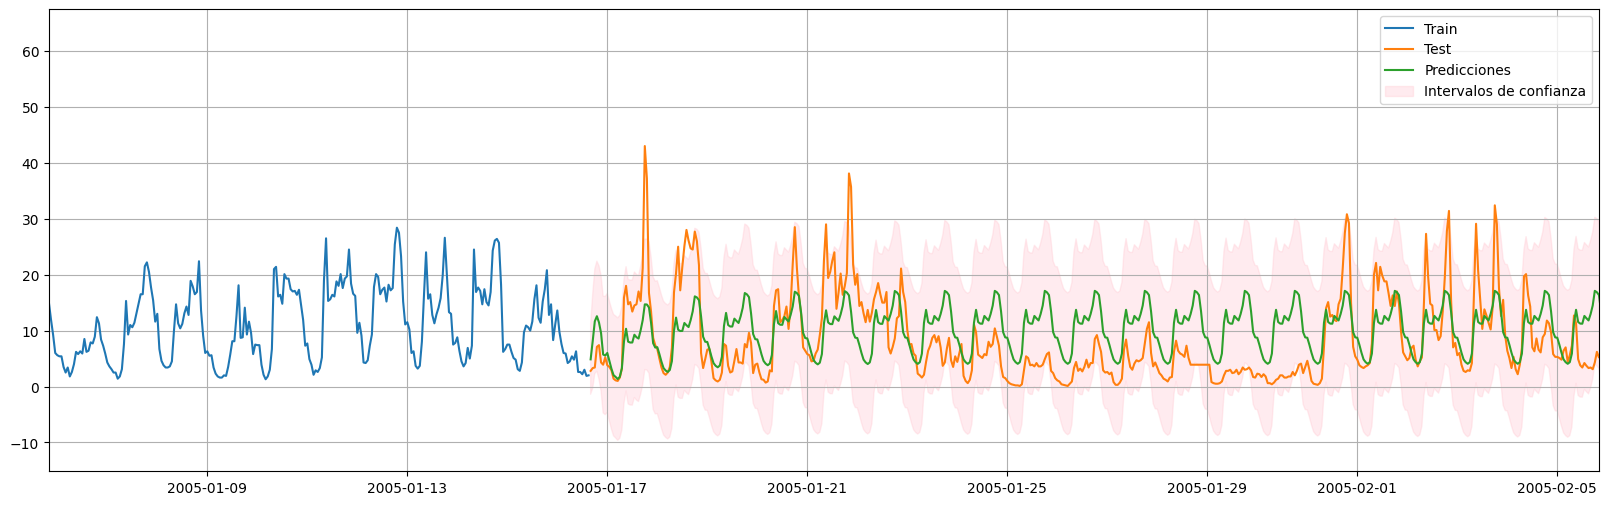

In [ ]:
# Grafico de los  resultados con mas detella definiendo los limites de tiempos

start_date = pd.Timestamp('2005-01-05 20:00:00')
end_date = pd.Timestamp('2005-02-05 20:00:00')
# Graficamos los resultados
plt.figure(figsize=(20, 6))
plt.plot(df_C6H6_train, label='Train')
plt.plot(df_C6H6_test.index, df_C6H6_test, label='Test')
plt.plot(df_C6H6_test.index, predicciones_C6H6_mean, label='Predicciones')

# Añadimos los intervalos de confianza a la gráfica
plt.fill_between(df_C6H6_test.index,
                 intervalos_confianza.iloc[:, 0],
                 intervalos_confianza.iloc[:, 1],
                 color='pink', alpha=0.3, label='Intervalos de confianza')

# Establecemos los límites del eje x
plt.xlim([start_date, end_date])
plt.grid(True)
plt.legend()
plt.show()

Nos damos cuenta que el modelo predice bien la estacionalidad pero no la volatilidad de la variable.

**Métricras del modelo: MSE y MAE**

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# Error cuadrático medio (MSE)
mse_C6H6 = mean_squared_error(df_C6H6_test, predicciones_C6H6_mean )
print(f"Error cuadrático medio (MSE) en conjunto de prueba modelo 2 variable C6H6: {mse_C6H6}")


Error cuadrático medio (MSE) en conjunto de prueba modelo 2 variable C6H6: 37.89800848043653


In [ ]:
# Error absoluto medeio (MAE)
mae_C6H6 = mean_absolute_error(df_C6H6_test, predicciones_C6H6_mean)

print(f"Error Absoluto Medio (MAE) en conjunto de prueba modelo 2 variable C6H6: {mae_C6H6}")

Error Absoluto Medio (MAE) en conjunto de prueba modelo 2 variable C6H6: 5.001253491783285


In [ ]:
# Raiz cuadrada de MSE (RMSE)
rmse_C6H6 = np.sqrt(mse_C6H6)

print(f"Raíz cuadrada del MSE en conjunto de prueba modelo 2 variable C6H6: {rmse_C6H6}")

Raíz cuadrada del MSE en conjunto de prueba modelo 2 variable C6H6: 6.156135839992205


In [ ]:
#promedio de los errores porcentuales absolutos
mape_C6H6 = np.mean(np.abs((df_C6H6_test- predicciones_C6H6_mean) / df_C6H6_test))*100

print(f"Promedio de los errores porcentuales absolutos de prueba modelo 2 variable C6H6: {mape_C6H6}")

Promedio de los errores porcentuales absolutos de prueba modelo 2 variable C6H6: 147.68691094804925


Este valor de MAPE no lo tomamos en cuenta porque da mayor que 100%, esto se debe a que hay valores de df_C6H6_test muy cercanos a cero y que lleva a predicciones inexactas en esos punto.

##**PUNTO 7:**

*Detallar una comparación con otros modelos estimados.*

Se compara el Modelo2_aut y se calcula el MSE y el MAE.

In [ ]:
# Ajustamos el modelo2_aut SARIMA  con los datos de entrenamiento
modeloB_C6H6_train = sm.tsa.SARIMAX(df_C6H6_train, order=(2, 1, 3), seasonal_order=(1, 1, 1, 24))
resultados_modeloB = modeloB_C6H6_train.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Realizar la predicción en el conjunto de prueba usando el comando get_prediction
predicciones_C6H6_B = resultados_modeloB.get_prediction(start=df_C6H6_test.index[0], end=df_C6H6_test.index[-1])
predicciones_C6H6_meanB = predicciones_C6H6_B.predicted_mean

mse_C6H6_B = mean_squared_error(df_C6H6_test, predicciones_C6H6_meanB)
print(f"Error cuadrático medio (MSE) en conjunto de prueba modelo B variable C6H6: {mse_C6H6_B}")

Error cuadrático medio (MSE) en conjunto de prueba modelo B variable C6H6: 239.17029132470955


In [ ]:
mae_C6H6_B = mean_absolute_error(df_C6H6_test, predicciones_C6H6_meanB)
print(f"Error Absoluto Medio (MAE) en conjunto de prueba modelo B variable C6H6: {mae_C6H6_B}")

Error Absoluto Medio (MAE) en conjunto de prueba modelo B variable C6H6: 13.12756879079427


In [ ]:
rmse_C6H6_B = np.sqrt(mse_C6H6_B)
print(f"Raíz cuadrada del MSE en conjunto de prueba modelo B variable C6H6: {rmse_C6H6_B}")

Raíz cuadrada del MSE en conjunto de prueba modelo B variable C6H6: 15.465131468070666


In [ ]:
mape_C6H6_B = np.mean(np.abs((df_C6H6_test- predicciones_C6H6_meanB) / df_C6H6_test)) * 100
print(f"Promedio de los errores porcentuales absolutos de prueba modelo B variable C6H6: {mape_C6H6_B}")

Promedio de los errores porcentuales absolutos de prueba modelo B variable C6H6: 312.32354289324843


En el modelo 2 (mejor valor de AIC) el MSE: 37.89 y el MAE: 5.00

En el modelo B (mayor valor de AIC) el MSE: 239.17 y el MAR: 13.12

Como era de esperar el modelo 2 de menor valor de AIC que tiene mejor performance (mejor equilibrio entre ajuste y complejidad) tiene errores menores.

[Anexo 2: comparativo métricas de los modelos](https://docs.google.com/spreadsheets/d/1a_1ifOEeA-F5Z702Jwmldl_1iOqBHnzh/edit?usp=sharing&ouid=106776308098076286911&rtpof=true&sd=true)




```


##**PUNTO 8:**

Análisis de los residuos para el Modelo B

In [ ]:
resultados_modelo2.plot_diagnostics(figsize=(20,15));
plt.tight_layout()
plt.show()

**Interpretación de gráficos:**

**Residuales estandarizados:** muestra los residuos estandarizados a lo largo del tiempo.Vemos que estan distribuidos de manera aleatoria alrededor de cero. Esto es bueno, no debe haber patrones obvios, lo que indicaría que el modelo está capturando bien la estructura de los datos. De todas maneras hay que constatarlo con el test de Box Pierce

**Histograma con densidad estimada:** histograma de los residuos junto con una densidad estimada (KDE) y la densidad teórica de una distribución normal estándar (N(0,1)). En varios momentos curva normal teórica no coincide con la curva real lo que indicaría que los residuos ni tienen una distribución.

**Gráfico Q-Q normal:** comparación de los cuantiles de los residuos con los cuantiles de una distribución normal. Los puntos deben alinearse  a lo largo de la línea roja que representa una distribución normal. Vemos desviaciones significativas en los extremos lo que indicaria que los residuos no siguen una distribución normal.

**Correlograma:** autocorrelaciones de los residuos. Los puntos dentro de las bandas de confianza puede indicar que el modelo ha capturado adecuadamente la estructura de autocorrelación de los datos.



**Test de Box Pierce**
Para confirmar que los residuos se comportan como ruido blanco (independientes y no autocorrelacionados) podemos usar el test de Box-Pierce y el de Ljung-Box.


In [ ]:
Incorrelacion_residuos_modelo2=sm.stats.acorr_ljungbox(resultados_modelo2.resid, lags=48)
print(Incorrelacion_residuos_modelo2)

       lb_stat     lb_pvalue
1     1.211153  2.711039e-01
2     1.712772  4.246941e-01
3     5.490808  1.391895e-01
4     5.535900  2.365918e-01
5    11.729046  3.869513e-02
6    11.845018  6.551693e-02
7    11.921410  1.031731e-01
8    13.560098  9.397670e-02
9    14.449145  1.072213e-01
10   17.510704  6.380002e-02
11   22.985024  1.776128e-02
12   26.143598  1.024269e-02
13   35.458335  7.196928e-04
14   40.489753  2.138983e-04
15   42.749267  1.721976e-04
16   47.782357  5.138617e-05
17   48.626696  6.883595e-05
18   50.387092  6.595200e-05
19   51.537813  7.756294e-05
20   51.545546  1.325831e-04
21   51.989391  1.916361e-04
22   53.283931  2.073023e-04
23   77.607023  7.714596e-08
24   77.762385  1.377011e-07
25  101.175880  3.973697e-11
26  101.201607  8.094527e-11
27  101.587507  1.410173e-10
28  101.591197  2.791965e-10
29  102.766686  3.513164e-10
30  103.585618  4.999535e-10
31  103.697549  9.109658e-10
32  104.778221  1.153404e-09
33  107.499658  8.051773e-10
34  110.130197

Text(0, 0.5, 'P-valores ')

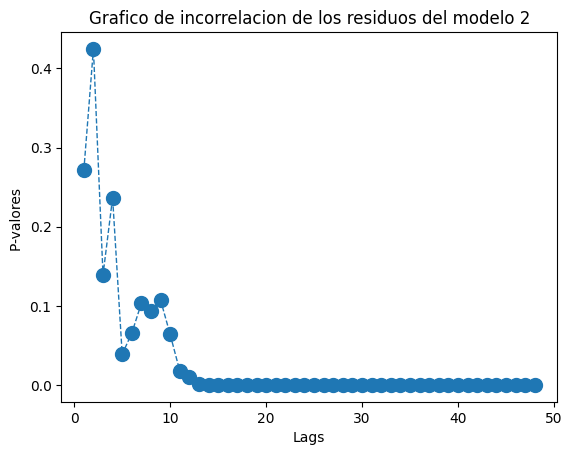

In [ ]:
plt.plot(Incorrelacion_residuos_modelo2.lb_pvalue, marker='o', markersize=10, linestyle='--', linewidth=1)
plt.title("Grafico de incorrelacion de los residuos del modelo 2")
plt.xlabel("Lags")
plt.ylabel("P-valores ")

In [ ]:
import statsmodels.api as sm
from scipy.stats import chi2

In [ ]:
# Test Box-Pierce
lags = 24
acf_values = sm.tsa.acf(resultados_modelo2.resid, nlags=lags, fft=False)

#Calculamos el estadistico de prueba Q de Box-Pierce
n = len(resultados_modelo2.resid)
Q = n * np.sum(np.square(acf_values[1:lags+1]))
p_value = 1 - chi2.cdf(Q, df=lags)

print(f'Estadística de prueba (Q): {Q:.4f}')
print(f'Valor p: {p_value:.4f}')
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay autocorrelación significativa en los residuos.")
else:
    print("No se rechaza la hipótesis nula: no hay autocorrelación significativa en los residuos.")

Estadística de prueba (Q): 77.5853
Valor p: 0.0000
Se rechaza la hipótesis nula: hay autocorrelación significativa en los residuos.


Estos residuos no se pueden consderar ruido blanco, no cumplen normalidad como tampoco no autocorrelacion. El modelo no es confiable.

##**PUNTO 9:**

Pronosticar con el modelo seleccionado para cada serie para una ventana temporal razonable, en función de la periodicidad y el comportamiento de las mismas.

In [ ]:
#Tomamos una ventana de 24 horas
Pronostico_C6H6 = resultados_modelo2.get_forecast(steps=24)
Intervalo_confianza_pronostico = Pronostico_C6H6.conf_int()
Pronostico_C6H6_mean = Pronostico_C6H6.predicted_mean

In [ ]:
# Crear el rango de fechas para las predicciones
# Supongamos que tus datos son horarios y df_C6H6_test.index[-1] es el último índice del conjunto de prueba
ultimo_dato = df_C6H6_test.index[-1]
datos_prediccion = pd.date_range(start=ultimo_dato, periods=24, freq='H')
print(datos_prediccion)

DatetimeIndex(['2005-04-04 14:00:00', '2005-04-04 15:00:00',
               '2005-04-04 16:00:00', '2005-04-04 17:00:00',
               '2005-04-04 18:00:00', '2005-04-04 19:00:00',
               '2005-04-04 20:00:00', '2005-04-04 21:00:00',
               '2005-04-04 22:00:00', '2005-04-04 23:00:00',
               '2005-04-05 00:00:00', '2005-04-05 01:00:00',
               '2005-04-05 02:00:00', '2005-04-05 03:00:00',
               '2005-04-05 04:00:00', '2005-04-05 05:00:00',
               '2005-04-05 06:00:00', '2005-04-05 07:00:00',
               '2005-04-05 08:00:00', '2005-04-05 09:00:00',
               '2005-04-05 10:00:00', '2005-04-05 11:00:00',
               '2005-04-05 12:00:00', '2005-04-05 13:00:00'],
              dtype='datetime64[ns]', freq='H')


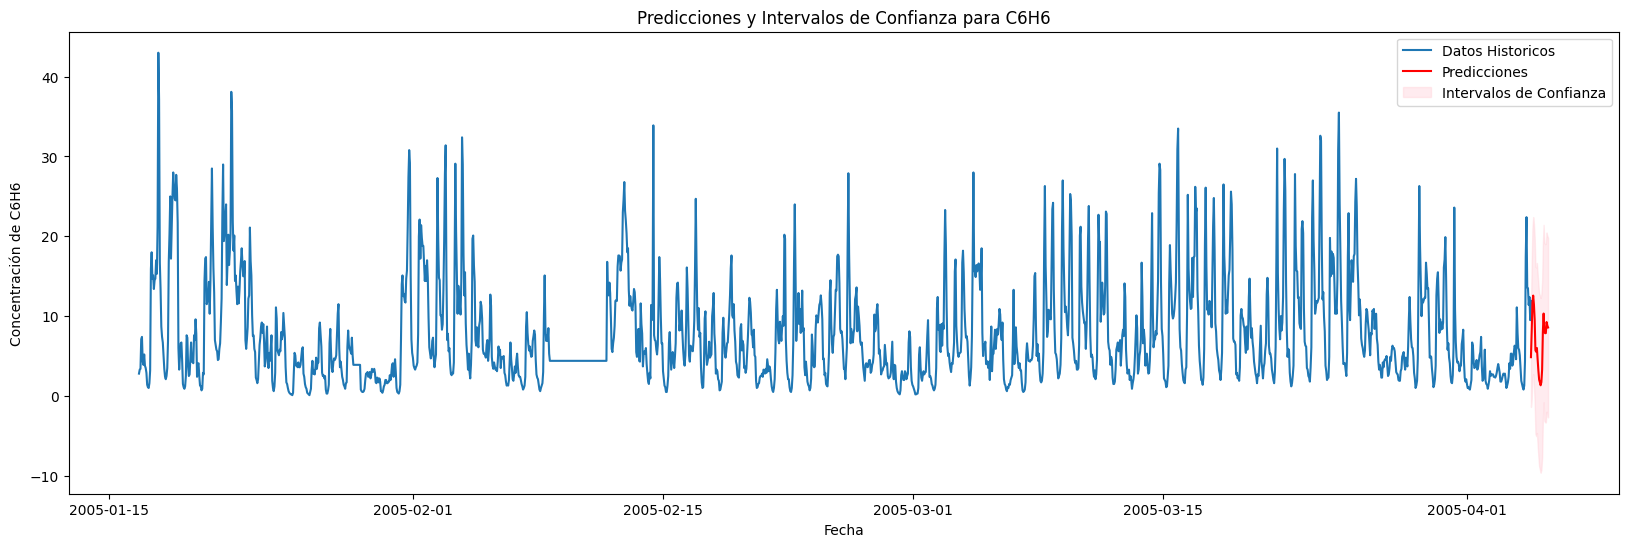

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(df_C6H6_test.index, df_C6H6_test, label='Datos Historicos')
plt.plot(datos_prediccion, Pronostico_C6H6_mean, label='Predicciones', color='red')
plt.fill_between(datos_prediccion,
                 Intervalo_confianza_pronostico.iloc[:, 0],
                 Intervalo_confianza_pronostico.iloc[:, 1],
                 color='pink', alpha=0.3, label='Intervalos de Confianza')

# Configuración adicional de la gráfica
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Concentración de C6H6')
plt.title('Predicciones y Intervalos de Confianza para C6H6')
plt.show()

In [ ]:


plt.figure(figsize=(20, 6))
start_date = pd.Timestamp('2005-04-01 20:00:00')
end_date = pd.Timestamp('2005-04-05 13:00:00')
plt.plot(df_C6H6_test.index, df_C6H6_test, label='Datos Historicos')
plt.plot(datos_prediccion, Pronostico_C6H6_mean, label='Predicciones', color='red')
plt.fill_between(datos_prediccion,
                 Intervalo_confianza_pronostico.iloc[:, 0],
                 Intervalo_confianza_pronostico.iloc[:, 1],
                 color='pink', alpha=0.3, label='Intervalos de Confianza')

plt.xlim(start_date, end_date)
plt.grid(True)
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Concentración de C6H6')
plt.title('Predicciones y Intervalos de Confianza para C6H6')
plt.show()

##**PUNTO 10:** notebook aparte



##**PUNTO 11:** notebook aparte

#**ANEXO 3:**

#**a) Modelo con los datos transformado con boxcox**

Se busca mejorar los resiudos para que el modelo se confiable. Se prueba con los datos transformado boxcox


In [ ]:
from scipy.special import inv_boxcox

In [ ]:
# Se utiliza el los datos transformados por boxco
df_C6H6_boxcox_train = df_C6H6_boxcox.iloc[:round(len(df_C6H6)*.8)]
df_C6H6_boxcox_test = df_C6H6_boxcox.iloc[round(len(df_C6H6)*.8):]


In [ ]:
#Se ajusta el modelo2 SARIMA  con los datos trasnformados
modelo_boxcox_train = sm.tsa.SARIMAX(df_C6H6_boxcox_train, order=(2, 0, 2), seasonal_order=(1, 1, 1, 24))
resultados_modelo_boxcox = modelo_boxcox_train.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [ ]:
# Realizar la predicción
predicciones_boxcox = resultados_modelo_boxcox.get_prediction(start=df_C6H6_boxcox_test.index[0], end=df_C6H6_boxcox_test.index[-1])
predicciones_boxcox_mean = predicciones_boxcox.predicted_mean
print(predicciones_boxcox_mean)

2005-01-16 16:00:00    1.356816
2005-01-16 17:00:00    1.926491
2005-01-16 18:00:00    2.512286
2005-01-16 19:00:00    2.714996
2005-01-16 20:00:00    2.712489
                         ...   
2005-04-04 10:00:00    3.140484
2005-04-04 11:00:00    3.124180
2005-04-04 12:00:00    3.139911
2005-04-04 13:00:00    3.378497
2005-04-04 14:00:00    3.272481
Freq: H, Name: predicted_mean, Length: 1871, dtype: float64


In [ ]:
# Destransformar Box-Cox
lambda_ = 0.26

# Destransformar los valores predichos
predicciones_destransformadas = np.power(lambda_ * predicciones_boxcox_mean + 1, 1 / lambda_)

print(predicciones_destransformadas)

2005-01-16 16:00:00     3.196762
2005-01-16 17:00:00     4.767188
2005-01-16 18:00:00     6.913649
2005-01-16 19:00:00     7.800601
2005-01-16 20:00:00     7.789143
                         ...    
2005-04-04 10:00:00     9.933059
2005-04-04 11:00:00     9.844202
2005-04-04 12:00:00     9.929924
2005-04-04 13:00:00    11.298981
2005-04-04 14:00:00    10.674472
Freq: H, Name: predicted_mean, Length: 1871, dtype: float64


In [ ]:
# Intervalos de confianza de las predicciones transformadas
intervalos_confianza = predicciones_boxcox.conf_int()

# Destransformar los intervalos de confianza
intervalos_confianza_destransformados = np.power(lambda_ * intervalos_confianza + 1, 1 / lambda_)

print(intervalos_confianza_destransformados)

                     lower C6H6_boxcox  upper C6H6_boxcox
2005-01-16 16:00:00           1.533347           5.922394
2005-01-16 17:00:00           1.848999          10.187056
2005-01-16 18:00:00           2.578239          15.147771
2005-01-16 19:00:00           2.779973          17.582649
2005-01-16 20:00:00           2.632650          18.135627
...                                ...                ...
2005-04-04 10:00:00           1.765751          32.575985
2005-04-04 11:00:00           1.740963          32.362545
2005-04-04 12:00:00           1.764713          32.569868
2005-04-04 13:00:00           2.156443          35.825850
2005-04-04 14:00:00           1.975085          34.351607

[1871 rows x 2 columns]


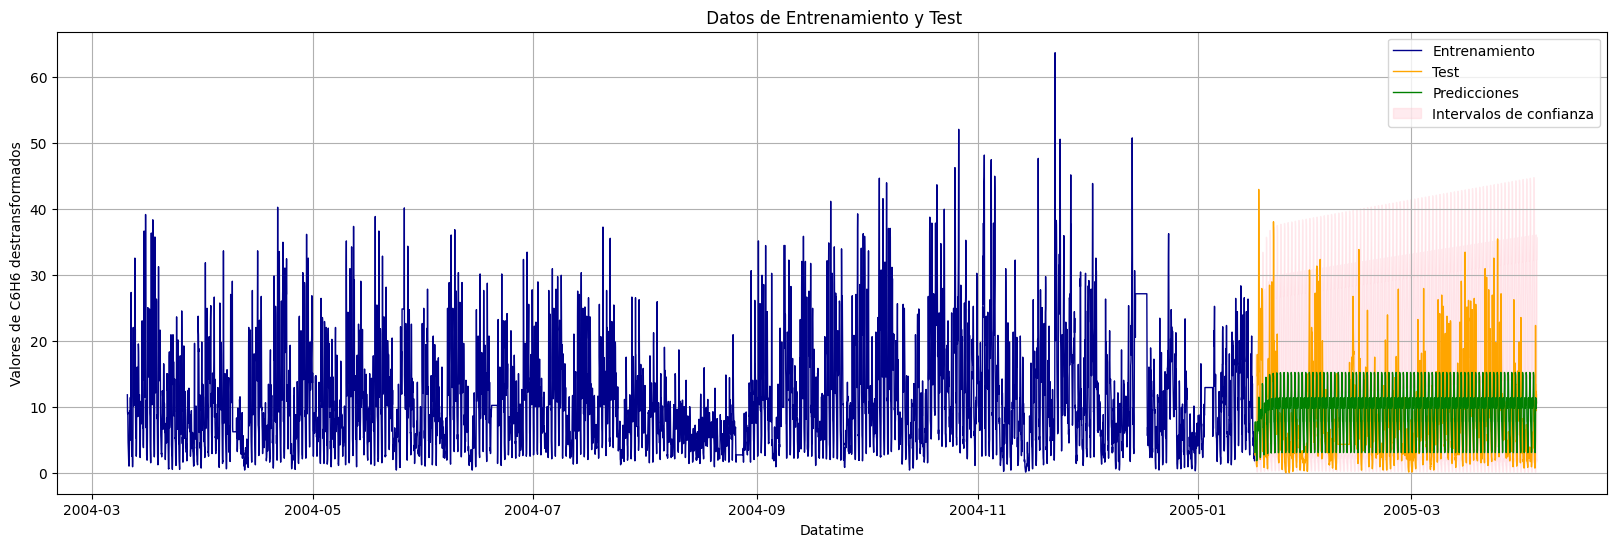

In [ ]:
# Graficar los resultados utilizando los valores destransformados

plt.figure(figsize=(20, 6))
plt.plot(df_C6H6_train, label='Entrenamiento', color='darkblue', linestyle='-', linewidth=1)
plt.plot(df_C6H6_test, label='Test', color='orange', linestyle='-', linewidth=1)
plt.plot(df_C6H6_test.index, predicciones_destransformadas, label='Predicciones', color='green', linestyle='-', linewidth=1 )

# Añadimos los intervalo de confianza a la gráfica
plt.fill_between(df_C6H6_test.index,
                 intervalos_confianza_destransformados.iloc[:, 0],
                 intervalos_confianza_destransformados.iloc[:, 1],
                 color='pink', alpha=0.3, label='Intervalos de confianza')


plt.title(' Datos de Entrenamiento y Test')
plt.xlabel('Datatime')
plt.ylabel('Valores de C6H6 destransformados')
plt.grid(True)
plt.legend()
plt.show()

Analizamos las métricas del modelo

In [ ]:
# Métricas para el modelo SARIMAX
mse_boxcox = mean_squared_error(df_C6H6_test, predicciones_destransformadas)
rmse_boxcox = np.sqrt(mse_boxcox)
mae_boxcox = mean_absolute_error(df_C6H6_test, predicciones_destransformadas)
mape_boxcox = np.mean(np.abs((df_C6H6_test- predicciones_destransformadas) / df_C6H6_test)) * 100

print(f'Métricas boxcox:\nMSE: {mse_boxcox}\nRMSE: {rmse_boxcox}\nMAE: {mae_boxcox}\nMAPE: {mape_boxcox}')

Métricas SARIMAX:
MSE: 32.9408187898985
RMSE: 5.7394092718587775
MAE: 4.462595168924878
MAPE: 120.36090204273906


Se observa que las metricas del mismo modelo han mejorado habiendo realizado primero una transformacion de box cox previamente en los datos habiendolo destransformado luego para conocer los valores reales.
[Ver Anexo 2, comparativo de métricas:](https://docs.google.com/spreadsheets/d/1a_1ifOEeA-F5Z702Jwmldl_1iOqBHnzh/edit?usp=drive_link&ouid=106776308098076286911&rtpof=true&sd=true)

**Analisis de los Residuos**

In [ ]:
# Obtener los residuos del modelo ajustado
residuos_boxcox = resultados_modelo_boxcox.resid

# Destransformar los residuos
residuos_destransformados = np.power(lambda_ * residuos_boxcox + 1, 1 / lambda_)

# Graficar los residuos destransformados
plt.figure(figsize=(20, 6))
plt.plot(residuos_destransformados)
plt.title('Residuos destransformados')

Text(0.5, 1.0, 'Residuos destransformados')

In [ ]:
resultados_modelo_boxcox.plot_diagnostics(figsize=(20,15));
plt.tight_layout()
plt.show()

**Analisis de normalidad - Test Shapiro-Wilk**

In [ ]:
# Test de normalidad (Shapiro-Wilk)
from scipy.stats import shapiro
stat, p = shapiro(residuos_destransformados)
print('Estadístico de Shapiro-Wilk:', stat)
print('p-valor:', p)

Estadístico de Shapiro-Wilk: 0.7138291597366333
p-valor: 0.0


Se rechaza la H0 de que los residuos siguen una distribucion normal.

**Analisis de autocorrelación - Test Box-Pierce**

In [ ]:
Incorrelacion_residuos_destranformados=sm.stats.acorr_ljungbox(residuos_destransformados, lags=48)

In [ ]:
# Test Box-Pierce
lags = 24
acf_values = sm.tsa.acf(residuos_destransformados, nlags=lags, fft=False)

#Calculamos el estadistico de prueba Q de Box-Pierce
n = len(residuos_destransformados)
Q = n * np.sum(np.square(acf_values[1:lags+1]))
p_value = 1 - chi2.cdf(Q, df=lags)

print(f'Estadística de prueba (Q): {Q:.4f}')
print(f'Valor p: {p_value:.4f}')
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay autocorrelación significativa en los residuos.")
else:
    print("No se rechaza la hipótesis nula: no hay autocorrelación significativa en los residuos.")

Estadística de prueba (Q): 2795.9095
Valor p: 0.0000
Se rechaza la hipótesis nula: hay autocorrelación significativa en los residuos.


**Conclusión:** aunque con la transformación de box cox se mejoró el modelo, el mismo no cumple con las condiciones de ruido blanco, no es un modelo confiable. Se recomienda probar otros modelos que puedas captar la volatilidad que hay en los datos.  

#**b) Modelo VAR**

In [ ]:
# Se levantan las tres series
# Variable C6H6
# Reemplazar los valores -200 con NaN
df['C6H6'] = df['C6H6'].replace(-200, pd.NA)
df['T'] = df['T'].replace(-200, pd.NA)
df['RH'] = df['RH'].replace(-200, pd.NA)

# Aplicar forward fill para reemplazar los valores NaN
df['C6H6'].fillna(method='ffill', inplace=True)
df['T'].fillna(method='ffill', inplace=True)
df['RH'].fillna(method='ffill', inplace=True)



In [ ]:
dfVAR=df[['C6H6','T','RH']]
dfVAR.head()

C6H6     T    RH
Datetime                             
2004-03-10 18:00:00  11.9  13.6  48.9
2004-03-10 19:00:00   9.4  13.3  47.7
2004-03-10 20:00:00   9.0  11.9  54.0
2004-03-10 21:00:00   9.2  11.0  60.0
2004-03-10 22:00:00   6.5  11.2  59.6

In [ ]:
# Separacion Train/Test

# Variable que guarda el porcentaje de train
split = .9

# Seleccion de train
train = dfVAR.iloc[:round(len(dfVAR)*split)]

# Seleccionamos de test
test = dfVAR.iloc[round(len(dfVAR)*split):]

# Corroboramos que los limites se hayan establecido segun lo planificado
print(train,"\n\n", test)

                     C6H6     T    RH
Datetime                             
2004-03-10 18:00:00  11.9  13.6  48.9
2004-03-10 19:00:00   9.4  13.3  47.7
2004-03-10 20:00:00   9.0  11.9  54.0
2004-03-10 21:00:00   9.2  11.0  60.0
2004-03-10 22:00:00   6.5  11.2  59.6
...                   ...   ...   ...
2005-02-24 10:00:00   9.0   4.1  83.9
2005-02-24 11:00:00   6.5   4.6  82.0
2005-02-24 12:00:00   5.4   5.5  79.5
2005-02-24 13:00:00   7.4   6.7  76.2
2005-02-24 14:00:00   7.7   7.9  69.0

[8421 rows x 3 columns] 

                      C6H6     T    RH
Datetime                             
2005-02-24 15:00:00  10.7   8.5  66.3
2005-02-24 16:00:00  13.3   7.6  70.8
2005-02-24 17:00:00  13.2   7.2  72.4
2005-02-24 18:00:00  17.5   6.7  74.2
2005-02-24 19:00:00  17.7   6.1  75.8
...                   ...   ...   ...
2005-04-04 10:00:00  13.5  21.9  29.3
2005-04-04 11:00:00  11.4  24.3  23.7
2005-04-04 12:00:00  12.4  26.9  18.3
2005-04-04 13:00:00   9.5  28.3  13.5
2005-04-04 14:00:00  1

**Criterio Granger**

La hipótesis nula supone que el pasado de una variable no proporciona información adicional para predecir la otra variable más allá de lo que ya se puede predecir utilizando solo su propio pasado.

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

In [ ]:
# P-valores menores al nivel de significancia (0.05) implica que la hipotesis nula (X no causa Y) puede rechazarse.
# testgr: Es el tipo de prueba que se utilizará para evaluar la causalidad de Granger. Por defecto, se utiliza 'ssr_chi2test', que es una prueba basada en chi-cuadrado,

def grangers_causation_matrix(data, variables, maxlag, testgr='ssr_chi2test', verbose=False):


    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [(test_result[i+1][0][testgr][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

# se agrega '_x' al final de los nombres de las columnas para indicar que son las variables "causantes" y '_y' al final de los nombres de las filas para indicar que son las variables "afectadas".

In [ ]:
testgr = 'ssr_chi2test'
grangers_causation_matrix(train, variables = train.columns, maxlag=24)

C6H6_x            T_x           RH_x
C6H6_y   1.000000e+00  1.756154e-164  2.733685e-103
T_y     3.017050e-207   1.000000e+00   2.375998e-57
RH_y    4.454443e-147   4.485332e-64   9.999990e-01

H0: La serie temporal X no causa grangerianamente la serie temporal Y.
H1: La serie temporal X causa grangerianamente la serie temporal Y.

Se rechaza la H0.
Interpretación: los valores pasados de Serie A (con un rezagos máximos de 24 períodos) proporcionan información estadísticamente significativa para predecir los valores futuros de Serie B. Esto sugiere una relación de causalidad grangeriana de Serie A hacia Serie B en este contexto específico.

In [ ]:
from statsmodels.tsa.api import VAR

In [ ]:
modelo = VAR(train)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [ ]:
x = modelo.select_order(maxlags=48)
x.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

Se toma el lag=47

In [ ]:
modelo_fitted = modelo.fit(47)
modelo_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 08, Jul, 2024
Time:                     22:49:41
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    4.30062
Nobs:                     8374.00    HQIC:                   4.06503
Log likelihood:          -51729.3    FPE:                    51.5657
AIC:                      3.94285    Det(Omega_mle):         49.0290
--------------------------------------------------------------------
Results for equation C6H6
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            0.925248         0.237974            3.888           0.000
L1.C6H6          0.930657         0.011100           83.841           0.000
L1.T            -0.059703         0.061790           -0.966           0.334
L1.RH

In [ ]:
# Funcion que recibe listas con las predicciones e intervalos de confianza de las 3 series y devuelve un
# dataframe para la serie indicada por la variable indice
def serializar(predicciones_, test_, indice, futuro_, intervalos=True):

    serie = {
        "FECHA": test_.index[:futuro_],
        "serie"+str(indice): predicciones_[0][:,indice-1].tolist(),
        "serie"+str(indice)+"_inf": predicciones_[1][:,indice-1].tolist(),
        "serie"+str(indice)+"_sup": predicciones_[2][:,indice-1].tolist()}
    serie = pd.DataFrame(serie, columns=["FECHA", "serie"+str(indice),
                                         "serie"+str(indice)+"_inf", "serie"+str(indice)+"_sup"])
    serie.set_index("FECHA", inplace=True)
    if (intervalos==False):
        serie.loc[serie["serie"+str(indice)+"_inf"] < 0, "serie"+str(indice)+"_inf"] = 0
        serie.loc[serie["serie"+str(indice)+"_sup"] < 0, "serie"+str(indice)+"_sup"] = 0
    return serie

In [ ]:
def graficar_pred(serie_test, serie_pred, titulo="Valores Originales vs Predicciones",
                  xlabel="Datatime", ylabel="Valor", intervalos=True):
    # serie_test:
    # serie_pred:

    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])

    # Graficamos los datos tests y las predicciones
    serie_test.plot(label="Serie Original de Test")
    serie_pred.iloc[:,0].plot(label="Predicciones")
    if (intervalos==True):
        serie_pred.iloc[:,2].plot(label="Intervalo de Confianza Superior")
        serie_pred.iloc[:,1].plot(label="Intervalo de Confianza Inferior")

    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.5', dashes=(5,2,1,2))

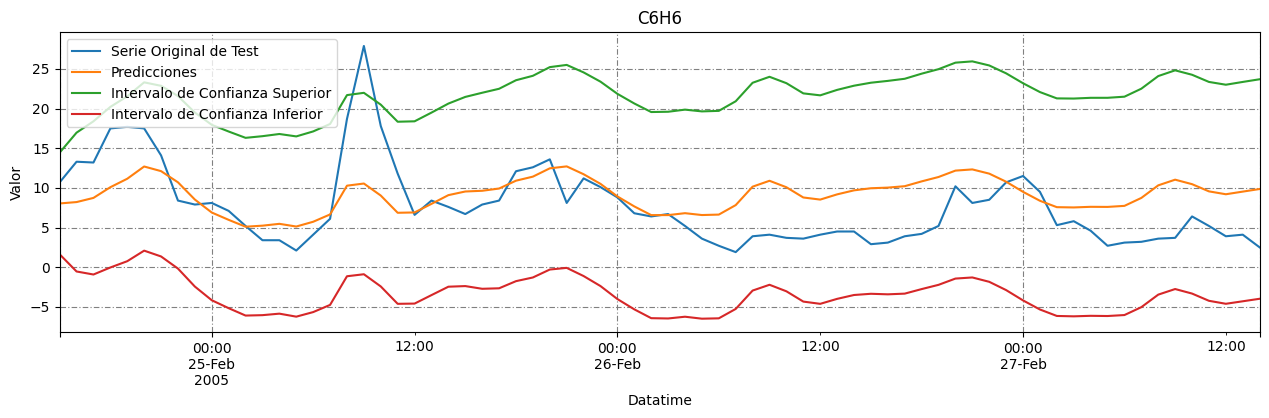

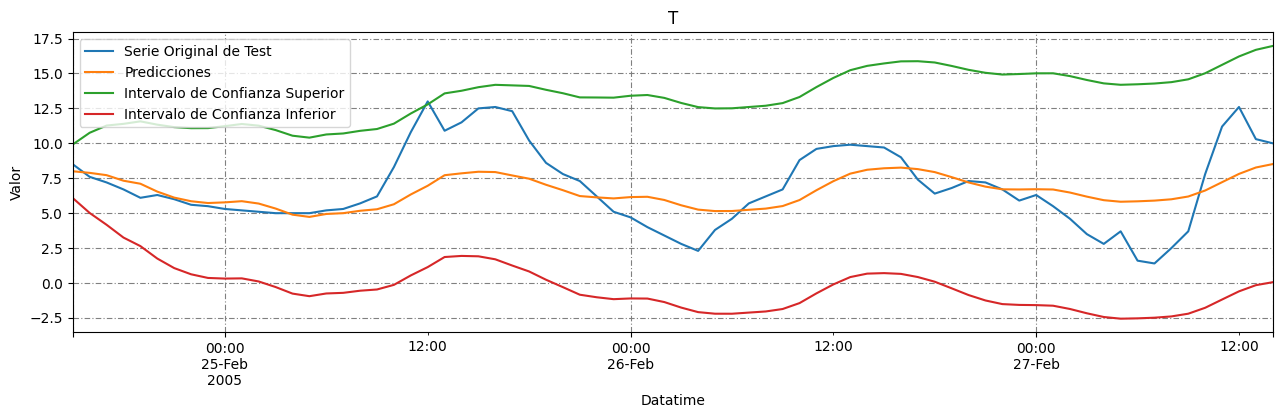

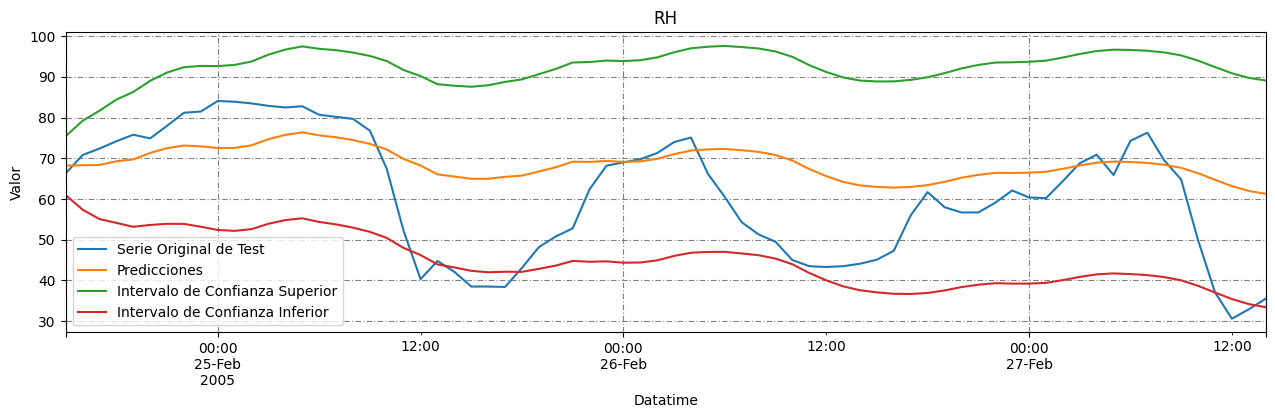

In [ ]:
# Con la variable futuro se indican cuantas unidades en tiempo
# hacia adelante se quieren predecir
futuro = 72
lag_orden = 47

predicciones = modelo_fitted.forecast_interval(train.values[-lag_orden:], steps=futuro)

df = list()
for i in [1, 2, 3]:
    df.append(serializar(predicciones, test, i, futuro))

for i, serie in enumerate(dfVAR):
    graficar_pred(test[serie][:futuro], df[i], titulo=serie)

In [ ]:
def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [ ]:
def test_residuos(residuos):


    # Test de Jarque Bera
    # H0: los datos estan distribuidos normalmente
    # Ha: los datos no estan distribuidos normalmente
    # Si p < 0.05 se rechaza la hipotesis nula
    jarquebera = jarque_bera(residuos)
    print('Jarque-Bera')
    print(f'p-valor: {jarquebera[1]}\n')

    # Test de Shapiro Wilks
    # H0: los datos estan distribuidos normalmente
    # Ha: los datos no estan distribuidos normalmente
    # Si p < 0.05 se rechaza la hipotesis nula
    shapir = shapiro(residuos)
    print('Shapiro')
    print(f'p-valor: {shapir[1]}\n')

In [ ]:
def evaluar_residuos(residuos):
    residuos.plot(title='Residuos', figsize=(12, 3))
    plt.axhline(0, linestyle='--', color='k')
    plt.show()
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
    ax[0].set_title('Residuos KDE')
    ax[1].set_title('Q-Q Plot')
    residuos.plot(kind='kde', ax=ax[0])
    probplot(residuos, dist='norm', plot=ax[1])
    plt.show()
    acf = plot_acf(residuos)
    acf.set_size_inches(12,3)
    plt.show()
    print('Descriptivo Residuos\n')
    print(f'{residuos.describe()}\n\n')
    print('Test sobre los Residuos\n')
    test_residuos(residuos)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import jarque_bera, shapiro, boxcox, probplot
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox, acorr_breusch_godfrey

In [ ]:
futuro

72

In [ ]:
test.C6H6[:futuro]

Datetime
2005-02-24 15:00:00    10.7
2005-02-24 16:00:00    13.3
2005-02-24 17:00:00    13.2
2005-02-24 18:00:00    17.5
2005-02-24 19:00:00    17.7
                       ... 
2005-02-27 10:00:00     6.4
2005-02-27 11:00:00     5.2
2005-02-27 12:00:00     3.9
2005-02-27 13:00:00     4.1
2005-02-27 14:00:00     2.5
Name: C6H6, Length: 72, dtype: float64

In [ ]:
test.RH[:futuro]

Datetime
2005-02-24 15:00:00    66.3
2005-02-24 16:00:00    70.8
2005-02-24 17:00:00    72.4
2005-02-24 18:00:00    74.2
2005-02-24 19:00:00    75.8
                       ... 
2005-02-27 10:00:00    49.9
2005-02-27 11:00:00    37.1
2005-02-27 12:00:00    30.6
2005-02-27 13:00:00    32.9
2005-02-27 14:00:00    35.5
Name: RH, Length: 72, dtype: float64

In [ ]:
test

C6H6     T    RH
Datetime                             
2005-02-24 15:00:00  10.7   8.5  66.3
2005-02-24 16:00:00  13.3   7.6  70.8
2005-02-24 17:00:00  13.2   7.2  72.4
2005-02-24 18:00:00  17.5   6.7  74.2
2005-02-24 19:00:00  17.7   6.1  75.8
...                   ...   ...   ...
2005-04-04 10:00:00  13.5  21.9  29.3
2005-04-04 11:00:00  11.4  24.3  23.7
2005-04-04 12:00:00  12.4  26.9  18.3
2005-04-04 13:00:00   9.5  28.3  13.5
2005-04-04 14:00:00  11.9  28.5  13.1

[936 rows x 3 columns]

C6H6
-----------------------------
MSE: 22.25490347535559
MAE: 3.7137046115774686
RMSE: 4.717510304742915
MAPE: 0.7416
Evaluacion de residuos de Serie 


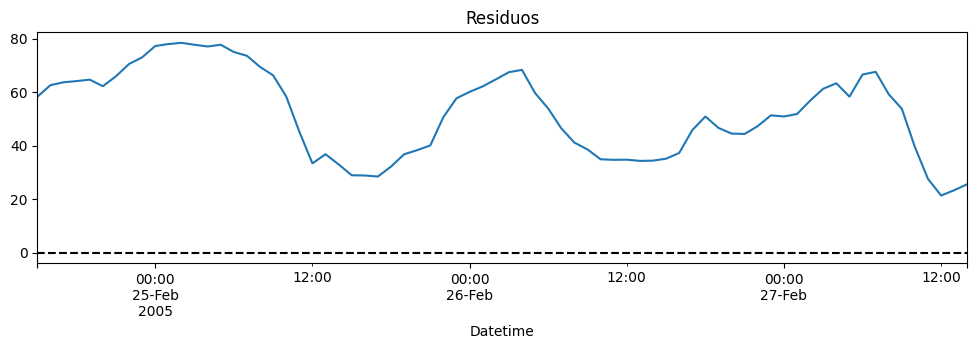

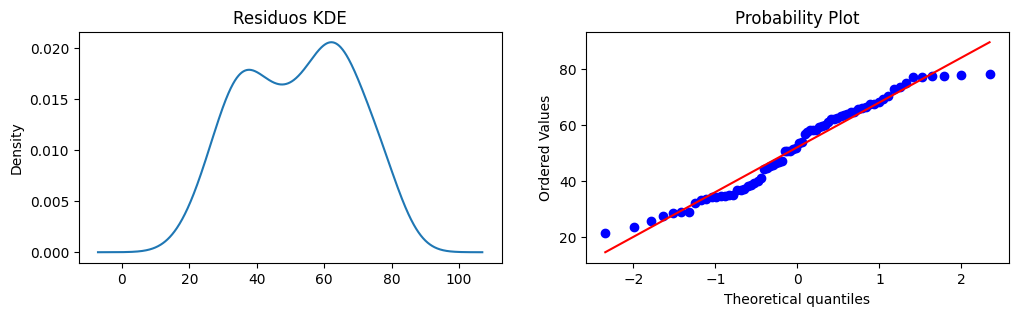

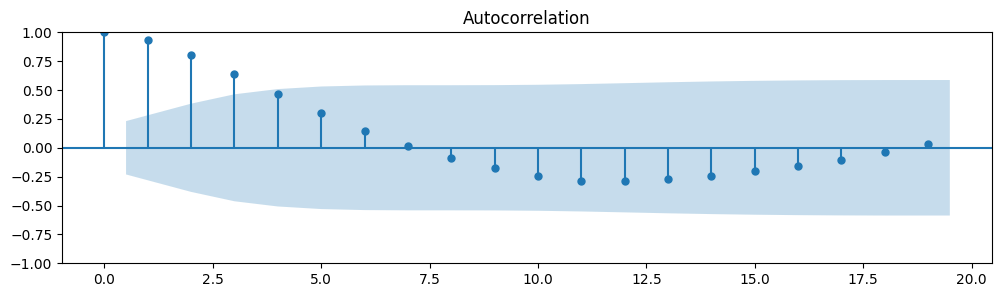

Descriptivo Residuos

count    72.000000
mean     52.074946
std      16.002912
min      21.402389
25%      37.151332
50%      52.794770
75%      64.667097
max      78.394516
dtype: float64


Test sobre los Residuos

Jarque-Bera
p-valor: 0.13153332131872744

Shapiro
p-valor: 0.012866227887570858



In [ ]:
print("C6H6")
print("-----------------------------")
evaluar_metricas(test.C6H6[:futuro], df[0].iloc[:,0])
print(f"Evaluacion de residuos de Serie ")
evaluar_residuos(test[serie][:futuro]-df[0].iloc[:,0])

RH
-----------------------------
MSE: 3232.197468092631
MAE: 54.620665914124594
RMSE: 56.85241831349508
MAPE: 0.8817
Evaluacion de residuos de Serie 


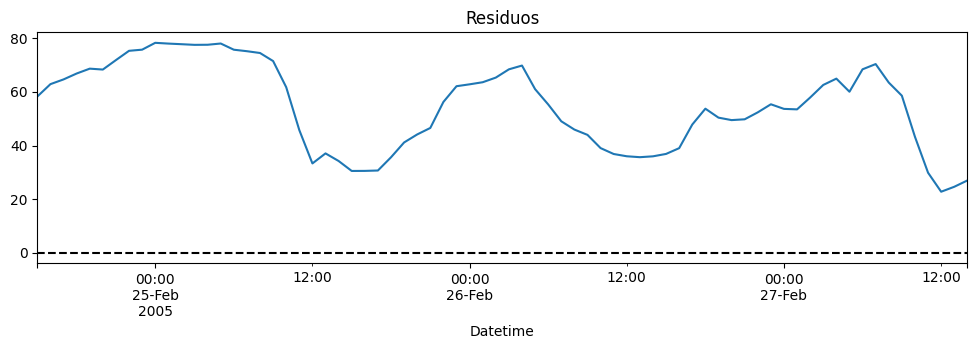

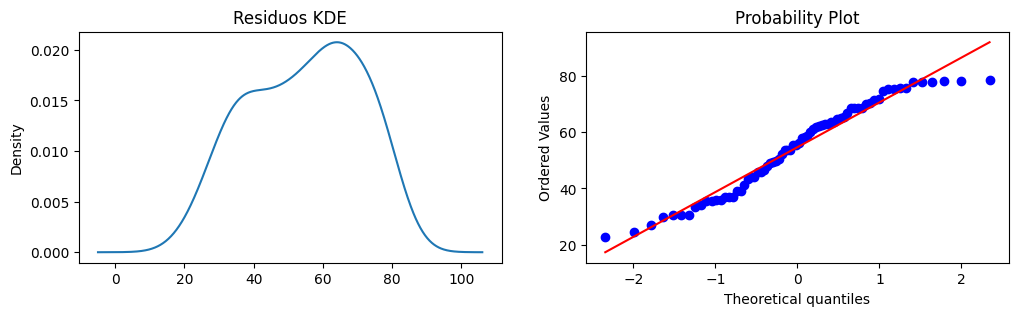

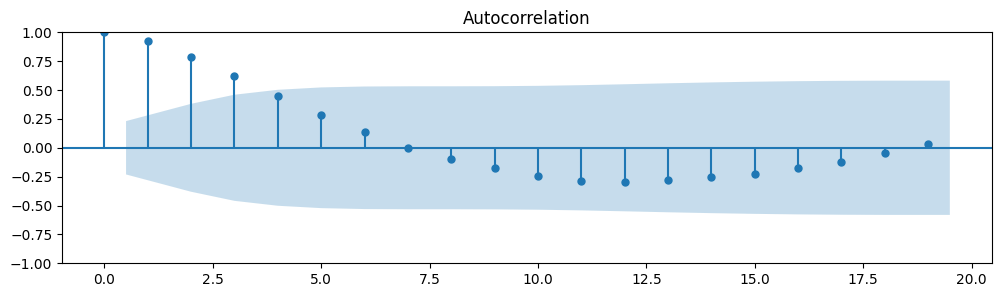

Descriptivo Residuos

count    72.000000
mean     54.620666
std      15.883459
min      22.789548
25%      40.640472
50%      55.836678
75%      68.376419
max      78.326631
dtype: float64


Test sobre los Residuos

Jarque-Bera
p-valor: 0.12030853583266843

Shapiro
p-valor: 0.007801495026797056



In [ ]:
print("RH")
print("-----------------------------")
evaluar_metricas(test.RH[:futuro], df[1].iloc[:,0])
print(f"Evaluacion de residuos de Serie ")
evaluar_residuos(test[serie][:futuro]-df[1].iloc[:,0])

T
-----------------------------
MSE: 3232.197468092631
MAE: 54.620665914124594
RMSE: 56.85241831349508
MAPE: 0.8817
Evaluacion de residuos de Serie 


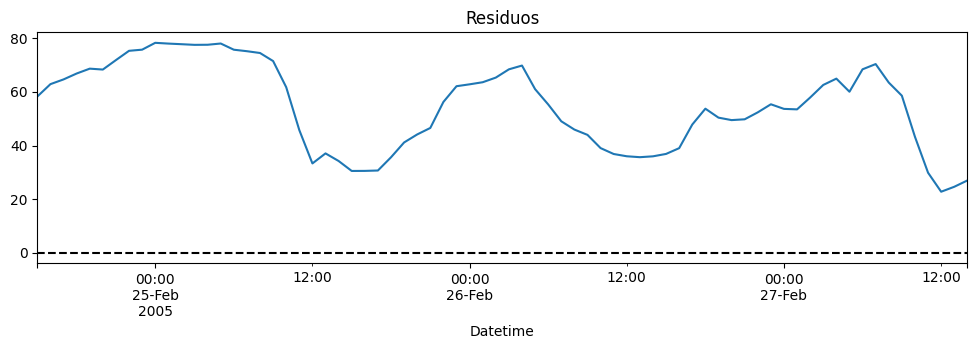

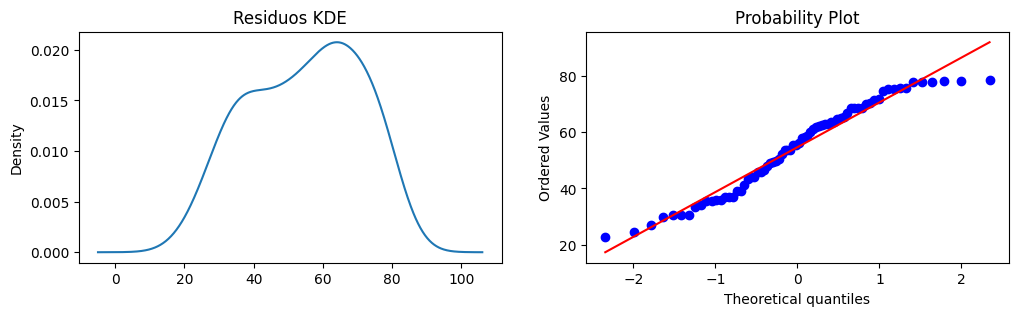

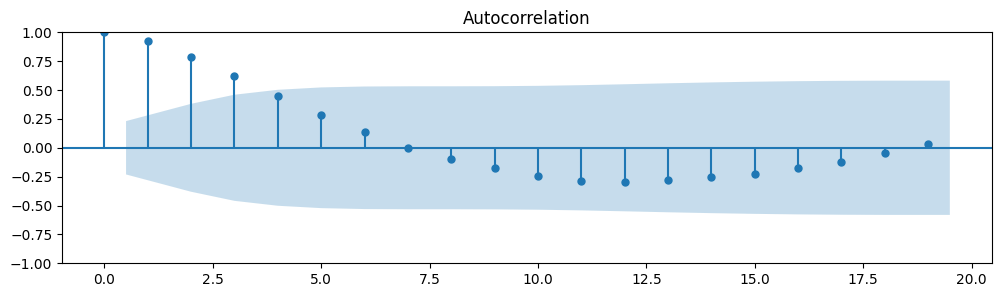

Descriptivo Residuos

count    72.000000
mean     54.620666
std      15.883459
min      22.789548
25%      40.640472
50%      55.836678
75%      68.376419
max      78.326631
dtype: float64


Test sobre los Residuos

Jarque-Bera
p-valor: 0.12030853583266843

Shapiro
p-valor: 0.007801495026797056



In [ ]:
print("T")
print("-----------------------------")
evaluar_metricas(test.RH[:futuro], df[1].iloc[:,0])
print(f"Evaluacion de residuos de Serie ")
evaluar_residuos(test[serie][:futuro]-df[1].iloc[:,0])

**Impulso respuesta**

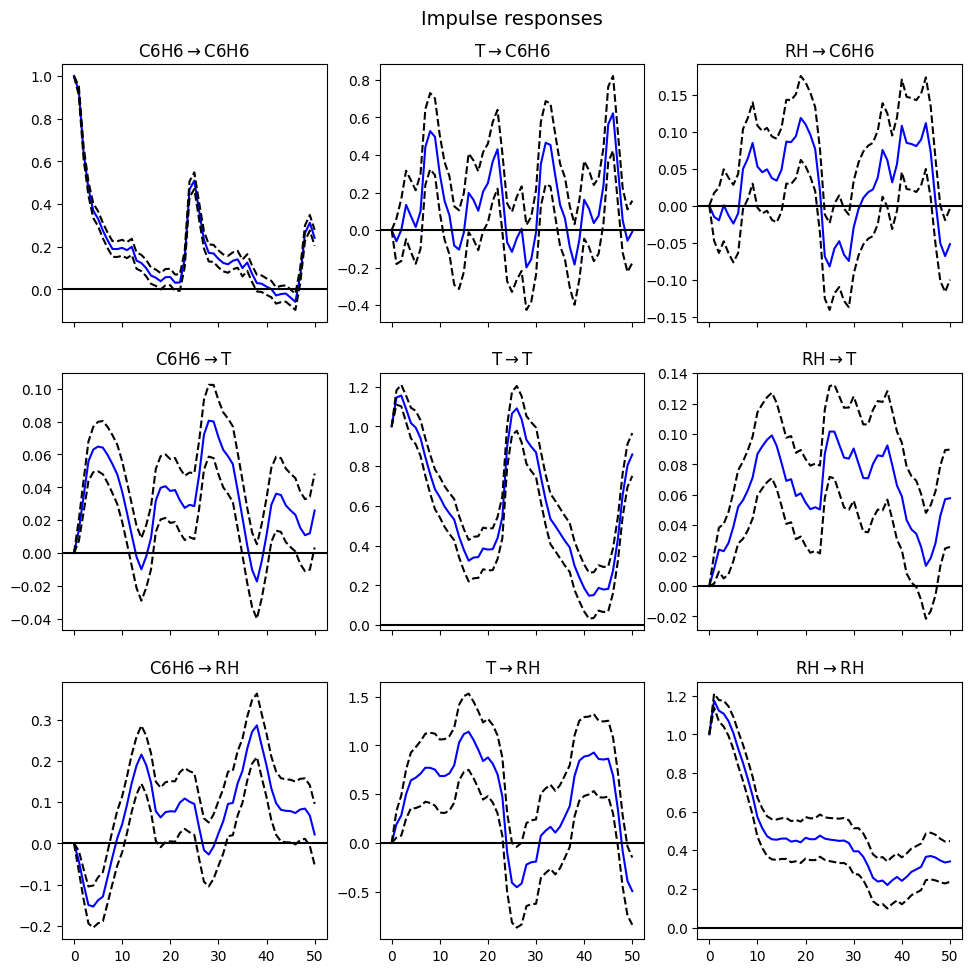

In [ ]:
modelo_fitted.irf(50).plot();